# Now this Dataset is all about Online Popularity Articles where as Data Science
# Professional i'hv to analyze which features are most responsible to say that it will get lot's of shares and are features which are spreading the shares are also correlated with the weekends or weekdays , let's see since i didn't have the sharing of article features , and on what features irrespective of  any day sharing most responsible .

# All the reason for the question will get Answer in this notebook and also i will develope some insights too for responsibility of popularity 


# Now importing necessary libraries

In [6]:
import pandas as pd 
import numpy as np 
from scipy.stats import zscore
from scipy.stats import skew,kurtosis
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Now importing Dataset Online_Popularity_csv


In [36]:
df=pd.read_csv('OnlineNewsPopularity.csv')
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

# So from this we can see that 61 features we have including shares variable

In [37]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

# from this as we can 
# 1> outliers are to much scaling is need in this see the difference in max value an mean values of every features.

# 2>we have to do some test to check which features is when and some is high using pandas 

# 3> we even have to factor analysis and i'hv try to develope a model that which can classify things as will get share at maximum or not but that will be last approaches , first to create ML models using FA analysis



In [38]:
newdf=df.copy()

In [39]:
newdf.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

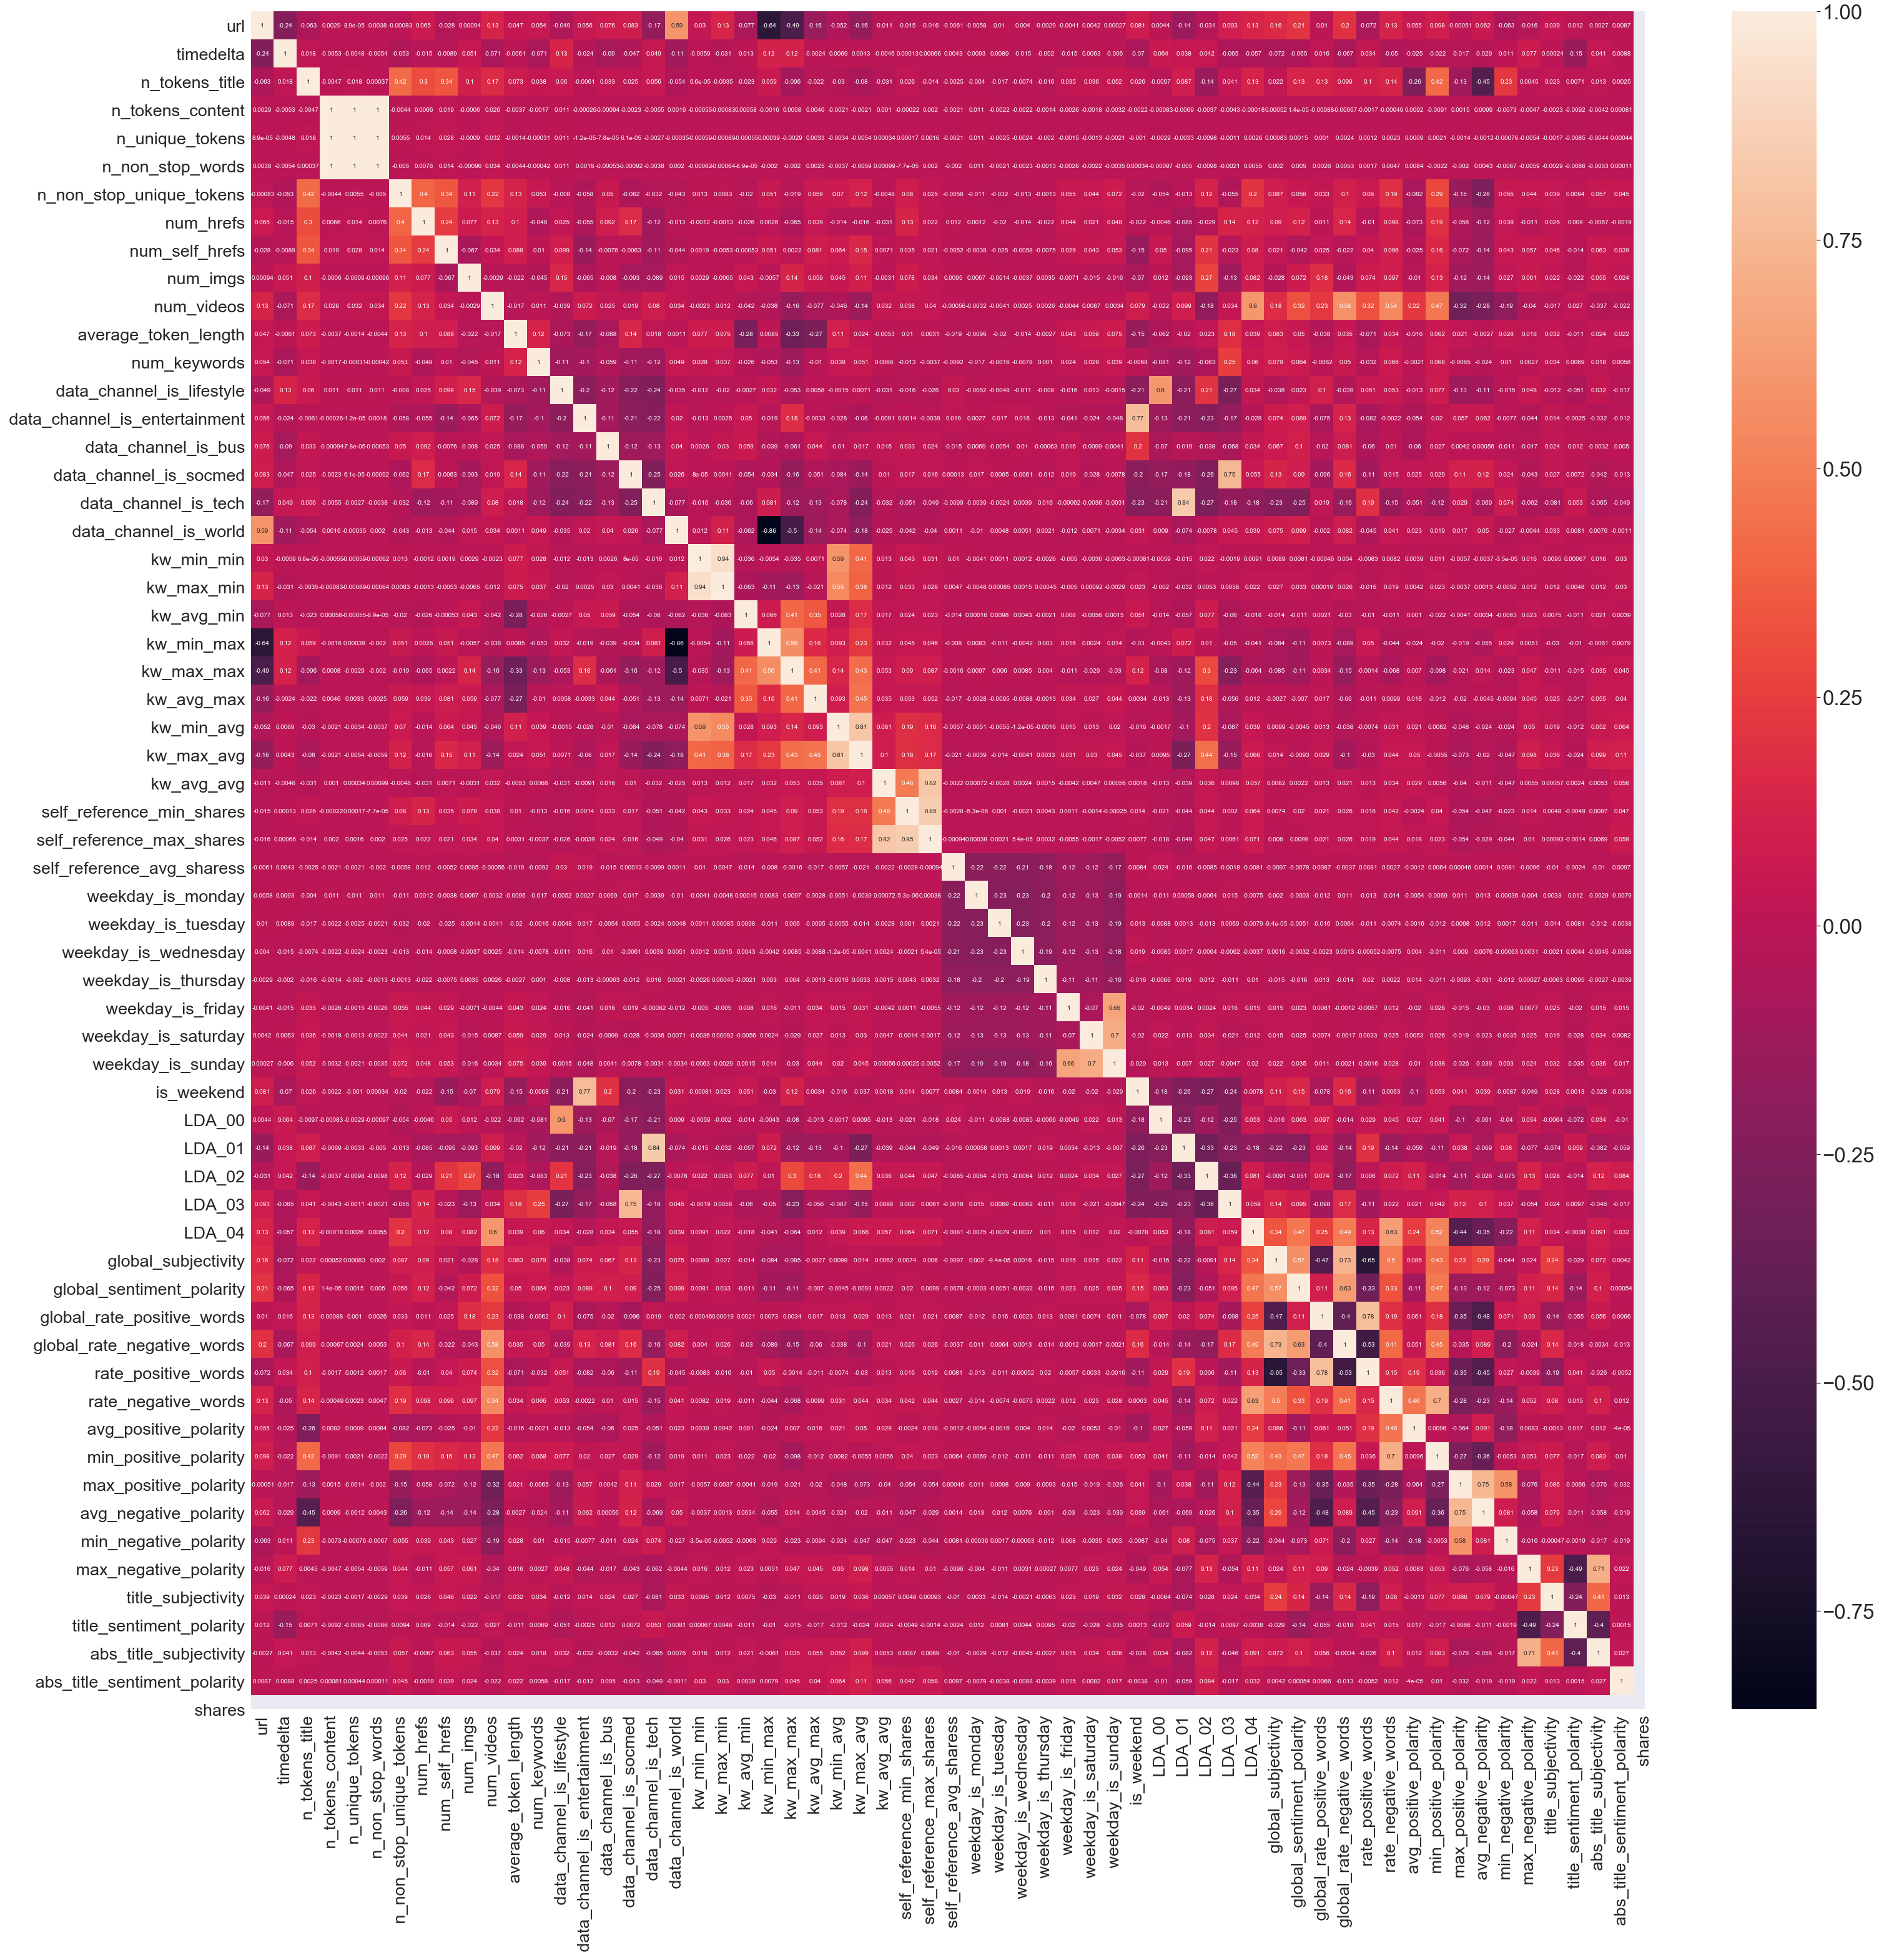

In [40]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['figure.figsize'] = 50,50
sns.heatmap(newdf.corr(),annot=True,xticklabels=newdf.columns,
        yticklabels=newdf.columns)
sns.set(font_scale=2)
plt.tick_params(axis='x', labelsize=27)
plt.tick_params(axis='y', labelsize=27)

# so from correlation token , content , title are correlated very strong
# link with stop words
# no of images with positive sentiment
# as data set is large we have to keep small but valuable analysis so moving hypothesis test

In [41]:
newdf.columns=['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', ' LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']
newdf.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', ' LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [42]:
# graph which show on which days sharing is done in how manner 
all_columns=list(newdf.columns)
categorical_cols = all_columns[13:19] + all_columns[31:39]


In [43]:
print(len(categorical_cols))
print(categorical_cols)
# so at present we have 14 categorical varibables 

14
['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']


In [46]:
numerical_cols = all_columns[2:13] + all_columns[19:31] + all_columns[39:60]
print(len(numerical_cols))

44


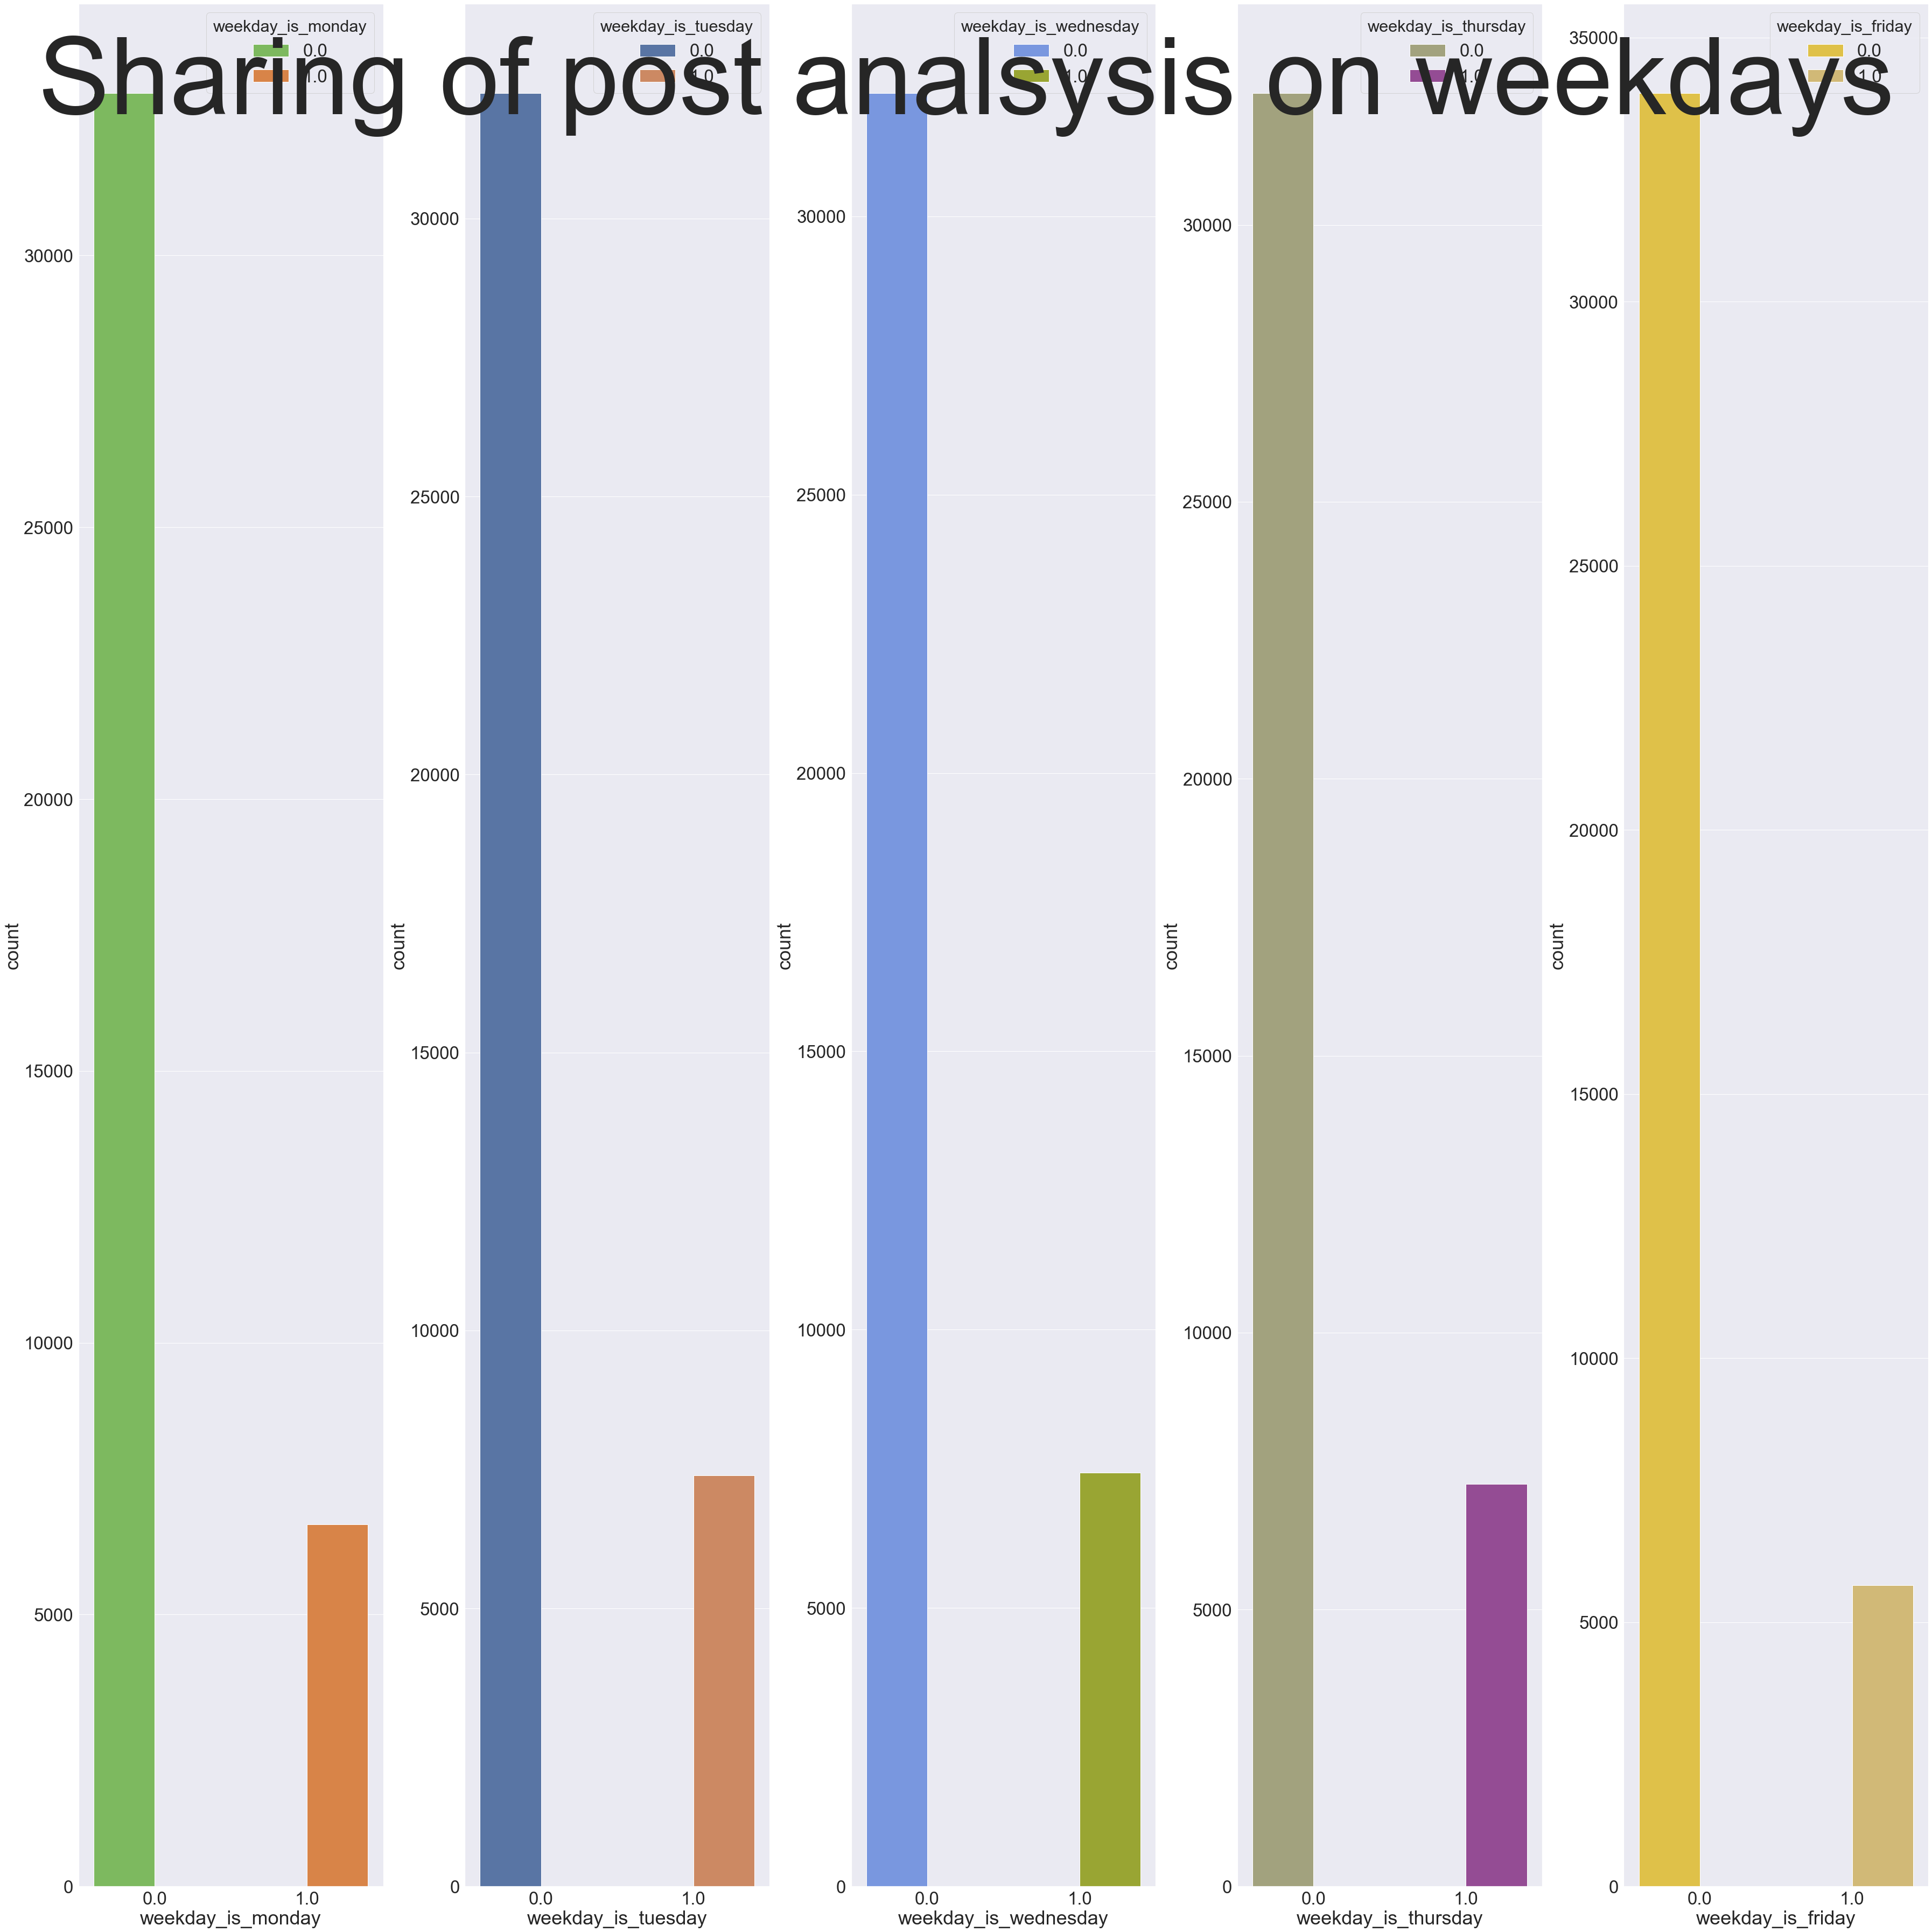

<Figure size 1440x1080 with 0 Axes>

In [44]:
# now ploting a graph for analysis of sharing that which categorical varibales

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.set(font_scale=3)

fig, ax =plt.subplots(1,5)
fig.subplots_adjust()
plt.figure(figsize=(20,15))
fig.suptitle('Sharing of post analsysis on weekdays',size=200)
sns.countplot(x=newdf.weekday_is_monday,hue=newdf.weekday_is_monday,data=newdf,palette=['#78C850','#F08030'],ax=ax[0])
sns.countplot(x=newdf.weekday_is_tuesday,hue=newdf.weekday_is_tuesday,data=newdf,ax=ax[1])
sns.countplot(x=newdf.weekday_is_wednesday,hue=newdf.weekday_is_wednesday,data=newdf,ax=ax[2],palette=['#6890F0','#A8B820',])
sns.countplot(x=newdf.weekday_is_thursday,hue=newdf.weekday_is_thursday,data=newdf,ax=ax[3],palette=['#A8A878',  # Normal
                    '#A040A0',])
sns.countplot(x=newdf.weekday_is_friday,hue=newdf.weekday_is_friday,data=newdf,ax=ax[4],palette=['#F8D030',  # Electric
                    '#E0C068',])
sns.set(style="darkgrid")

fig.tight_layout()

# first day weekday sharing is very less but as on tuesday till thursday shares increases and on friday downfall starts
# now with out weekend days

<Figure size 1440x1080 with 0 Axes>

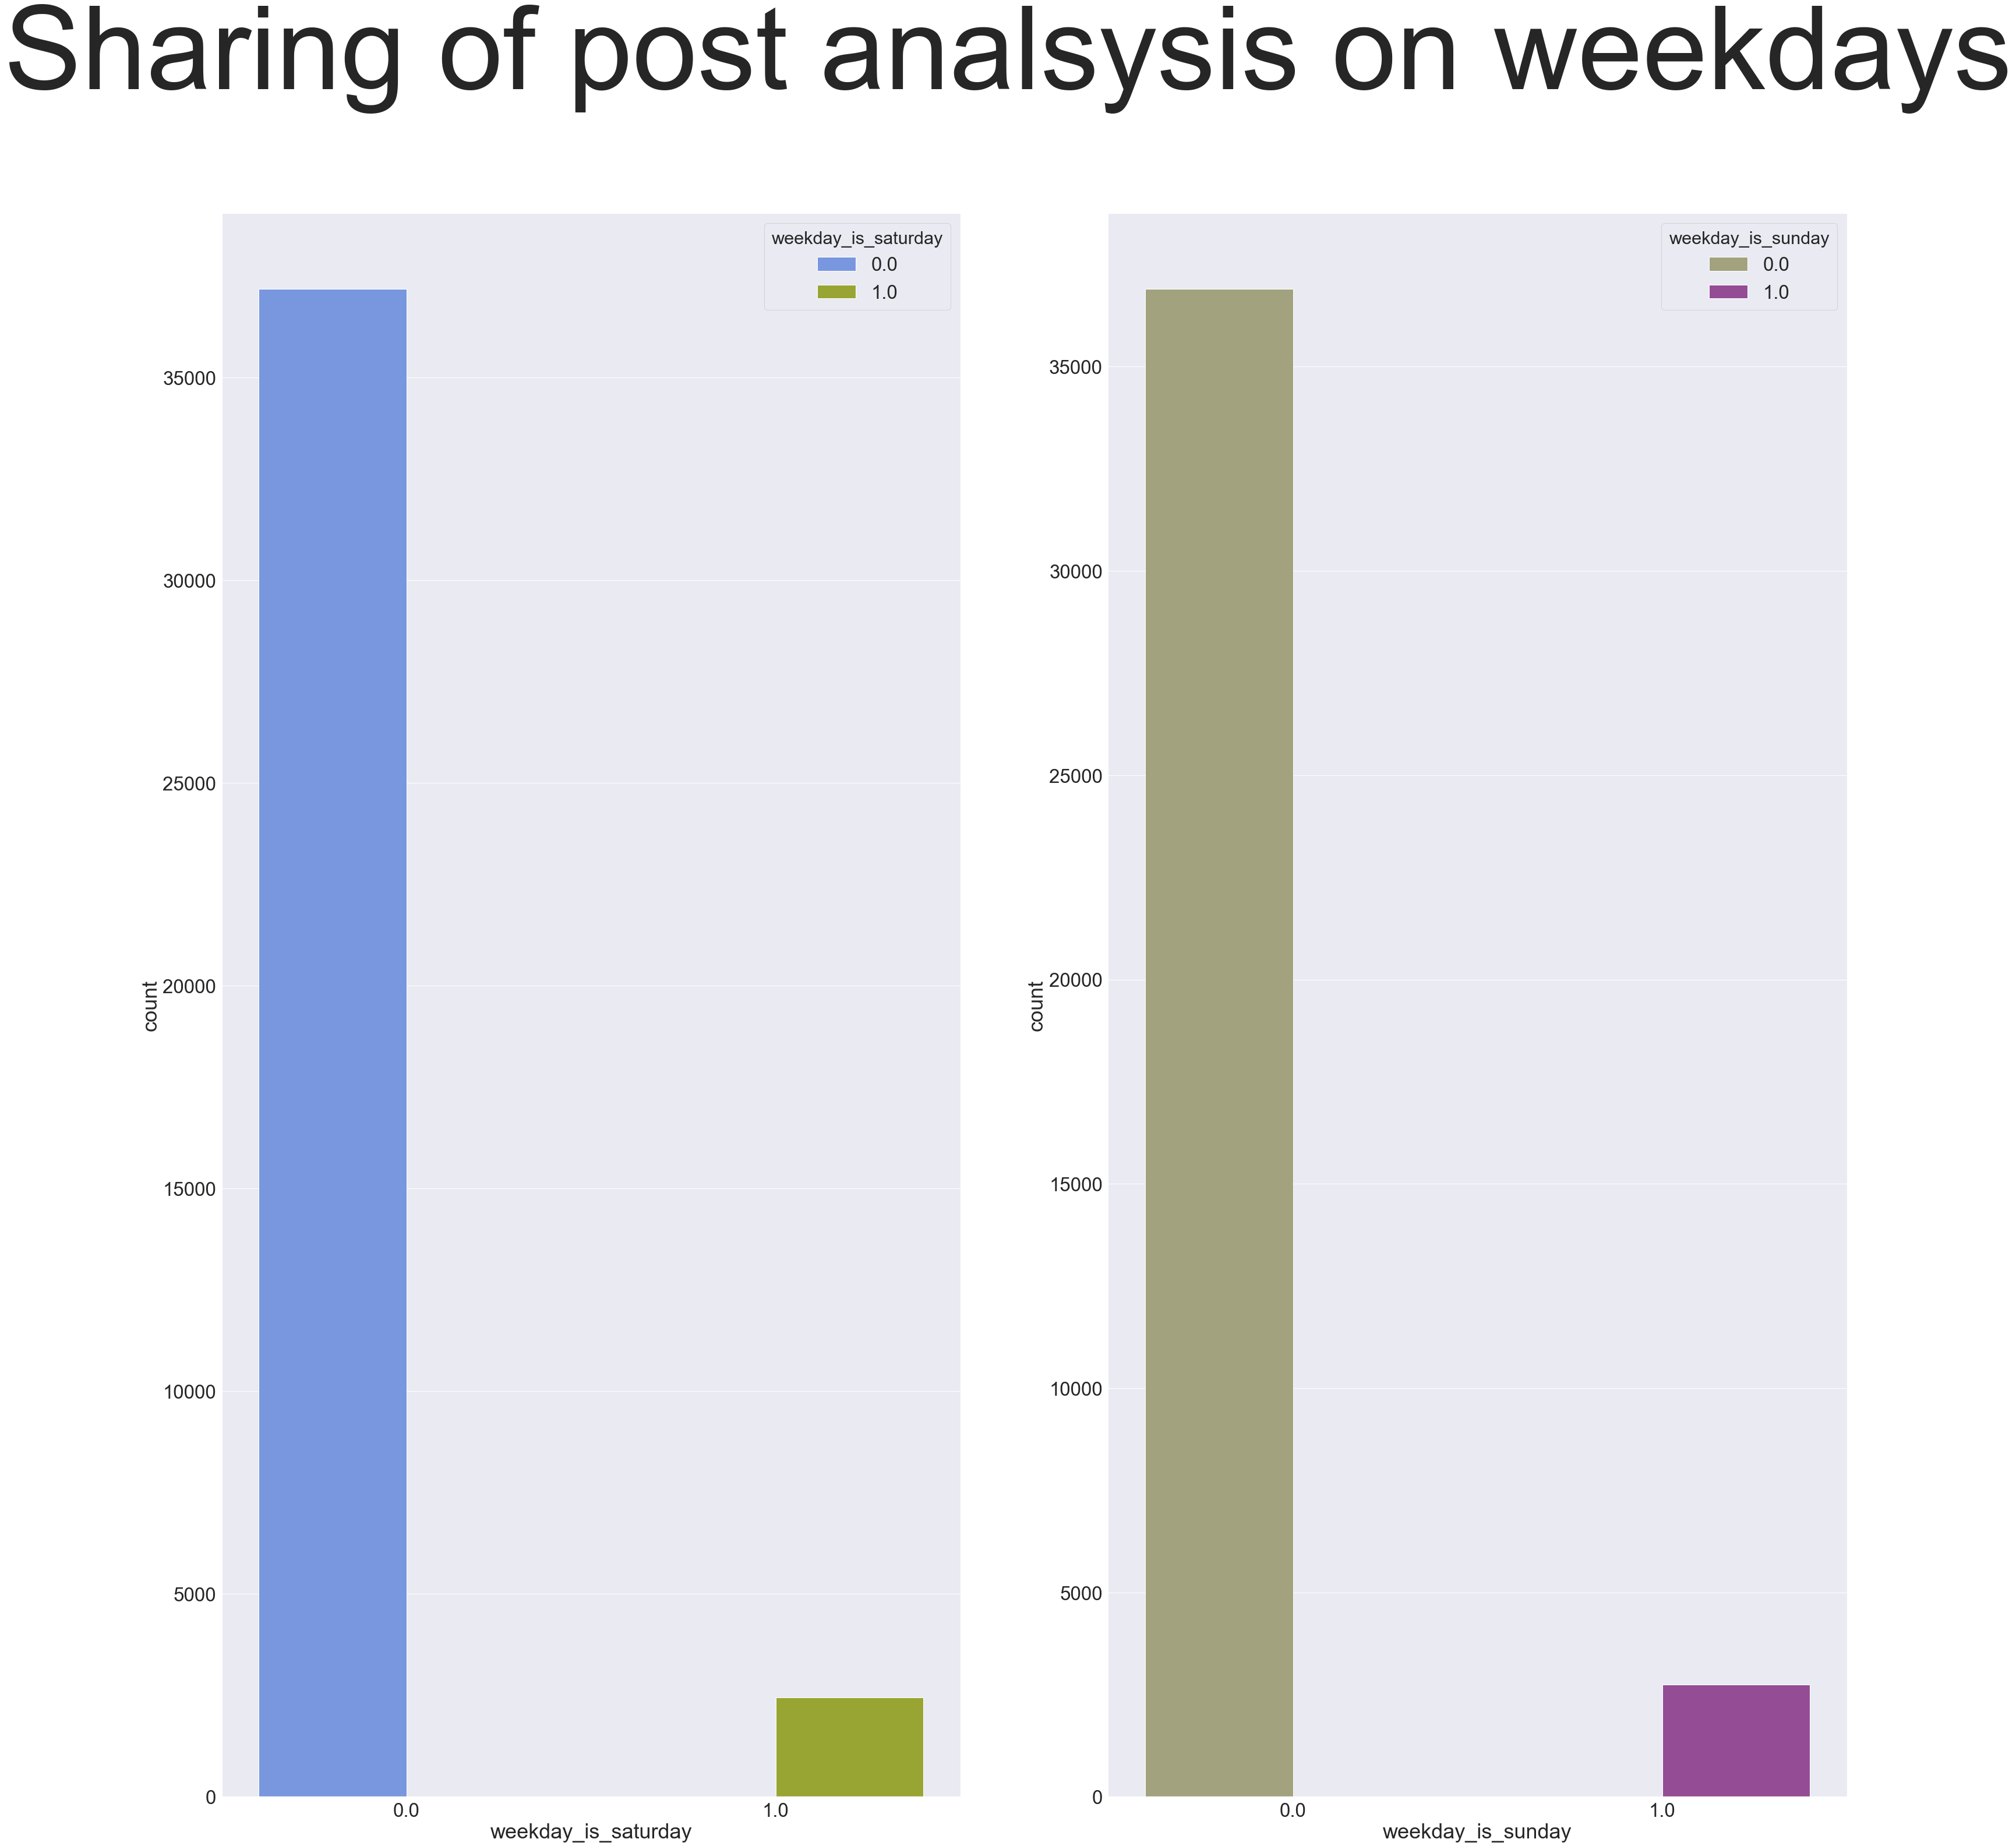

In [47]:
plt.figure(figsize=(20,15))
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.set(font_scale=3)

fig, ax =plt.subplots(1,2)
fig.subplots_adjust()
fig.suptitle('Sharing of post analsysis on weekdays',size=200)
sns.countplot(x=newdf.weekday_is_saturday,hue=newdf.weekday_is_saturday,data=newdf,ax=ax[0],palette=['#6890F0','#A8B820',])
sns.countplot(x=newdf.weekday_is_sunday,hue=newdf.weekday_is_sunday,data=newdf,ax=ax[1],palette=['#A8A878',  # Normal
                    '#A040A0',])


# AS we can draw a new inference that sat , sun are those days when people stays off from social media so , we can say any post has last chance if it initialise on weekend since if starts on first day of week, now we come on analysis of which type of articles shares on social fast now draw pie chart for that

In [50]:
bus1,bus0=(newdf.data_channel_is_bus==1).sum(),(newdf.data_channel_is_bus==0).sum()
tech1,tech0=(newdf.data_channel_is_tech==1).sum(),(newdf.data_channel_is_tech==0).sum()
life1,life0=(newdf.data_channel_is_lifestyle==1).sum(),(newdf.data_channel_is_lifestyle==0).sum()
world1,world0=(newdf.data_channel_is_world==1).sum(),(newdf.data_channel_is_world==0).sum()
scomed1,scomed0=(newdf.data_channel_is_socmed==1).sum(),(newdf.data_channel_is_socmed==0).sum()
ent1,ent0=(newdf.data_channel_is_entertainment==1).sum(),(newdf.data_channel_is_entertainment==0).sum()

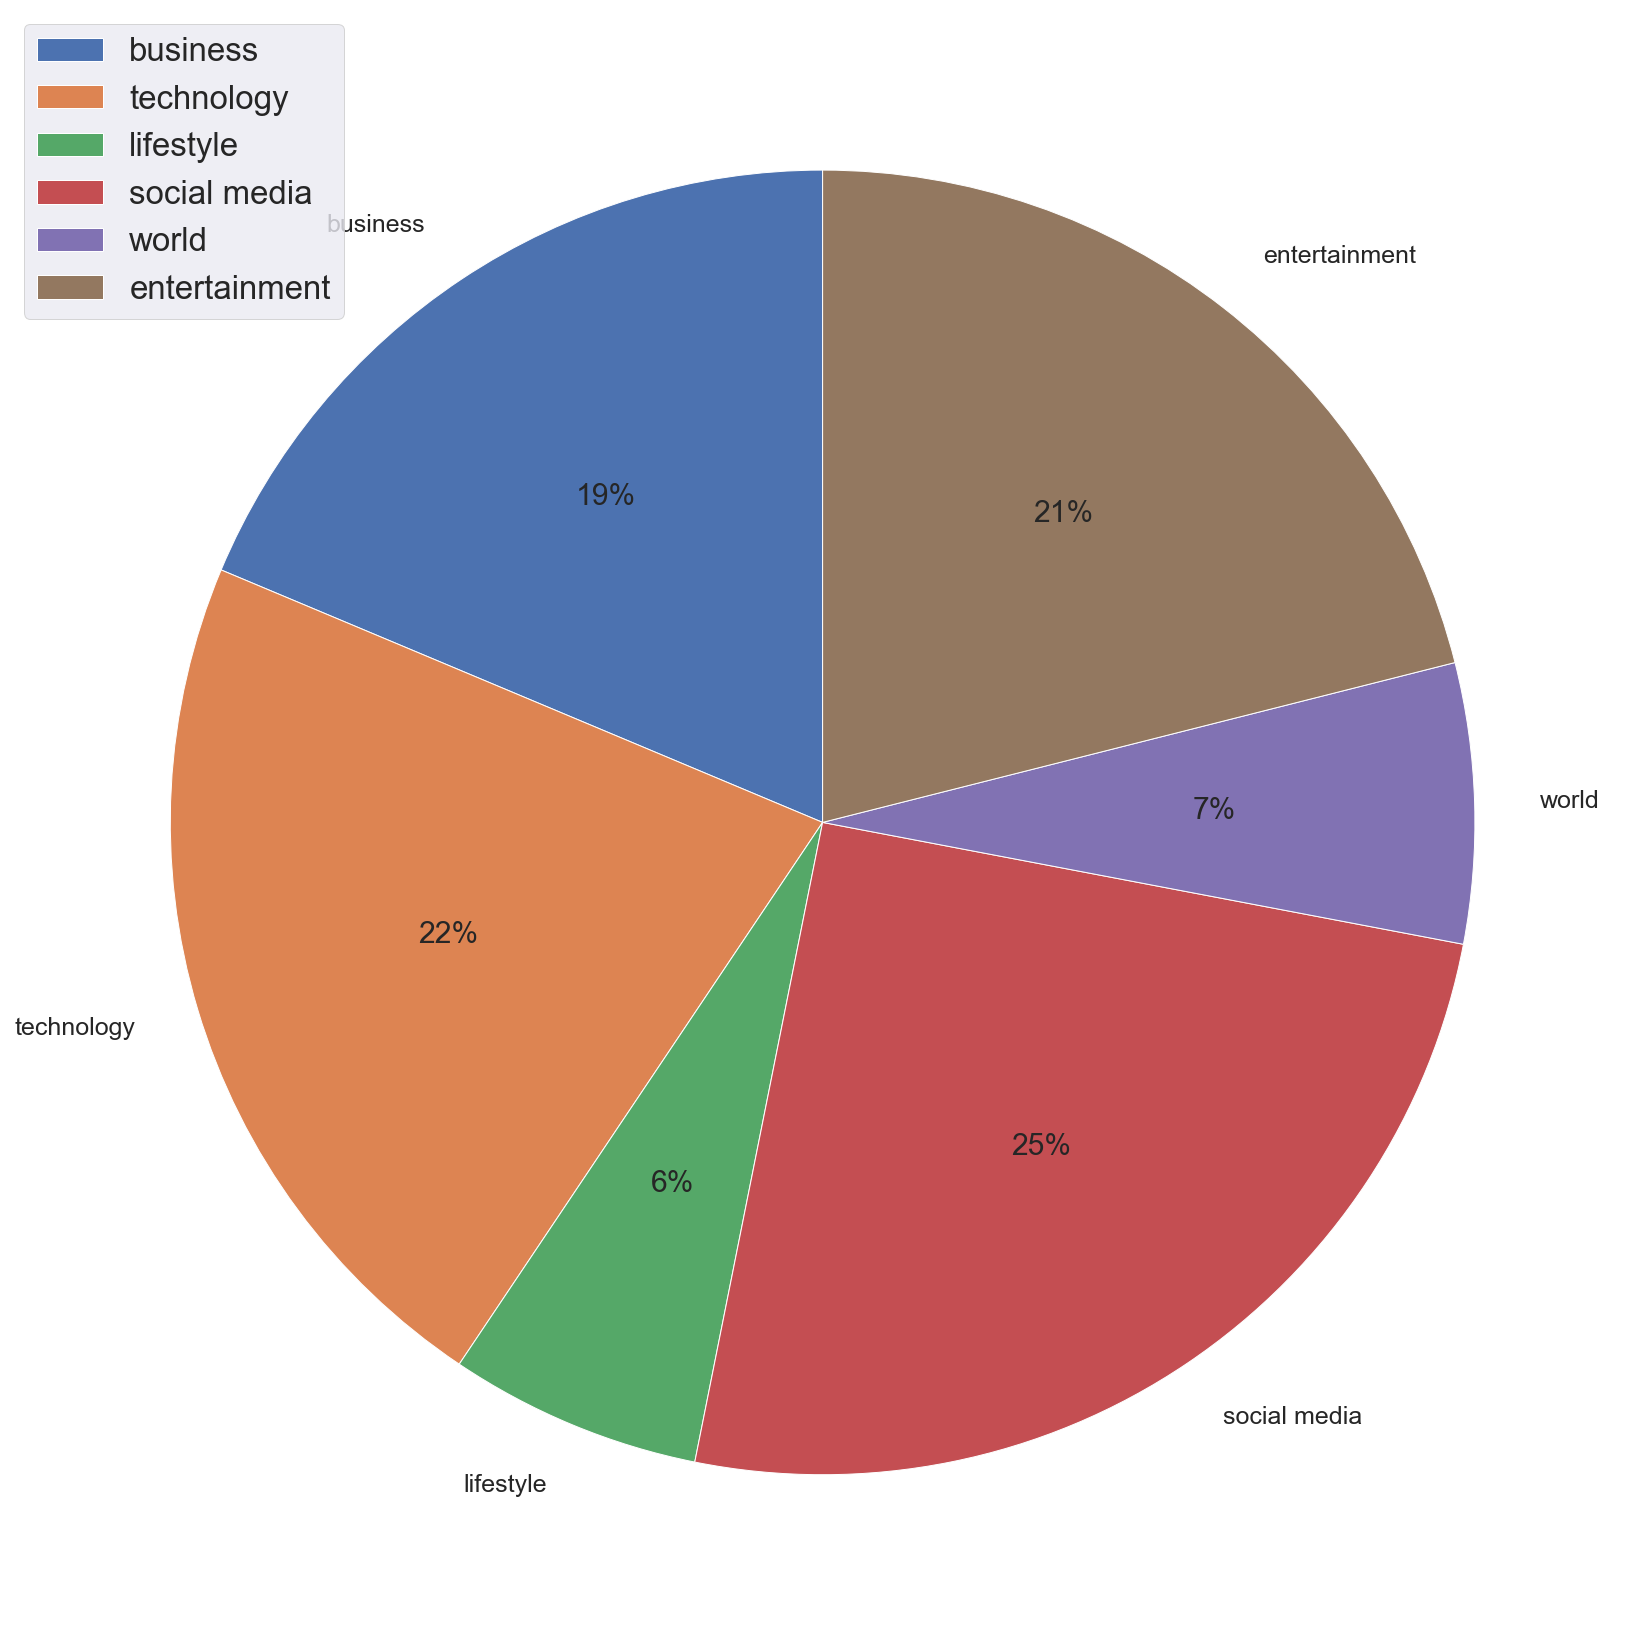

In [51]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0
labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))
sizes = [bus1,tech1,life1,world1,scomed1,ent1]
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend(loc=2)
plt.show()

# Now from this graph we can easily Analyze that most of article shared were related to social_media,technology , entertainment¶

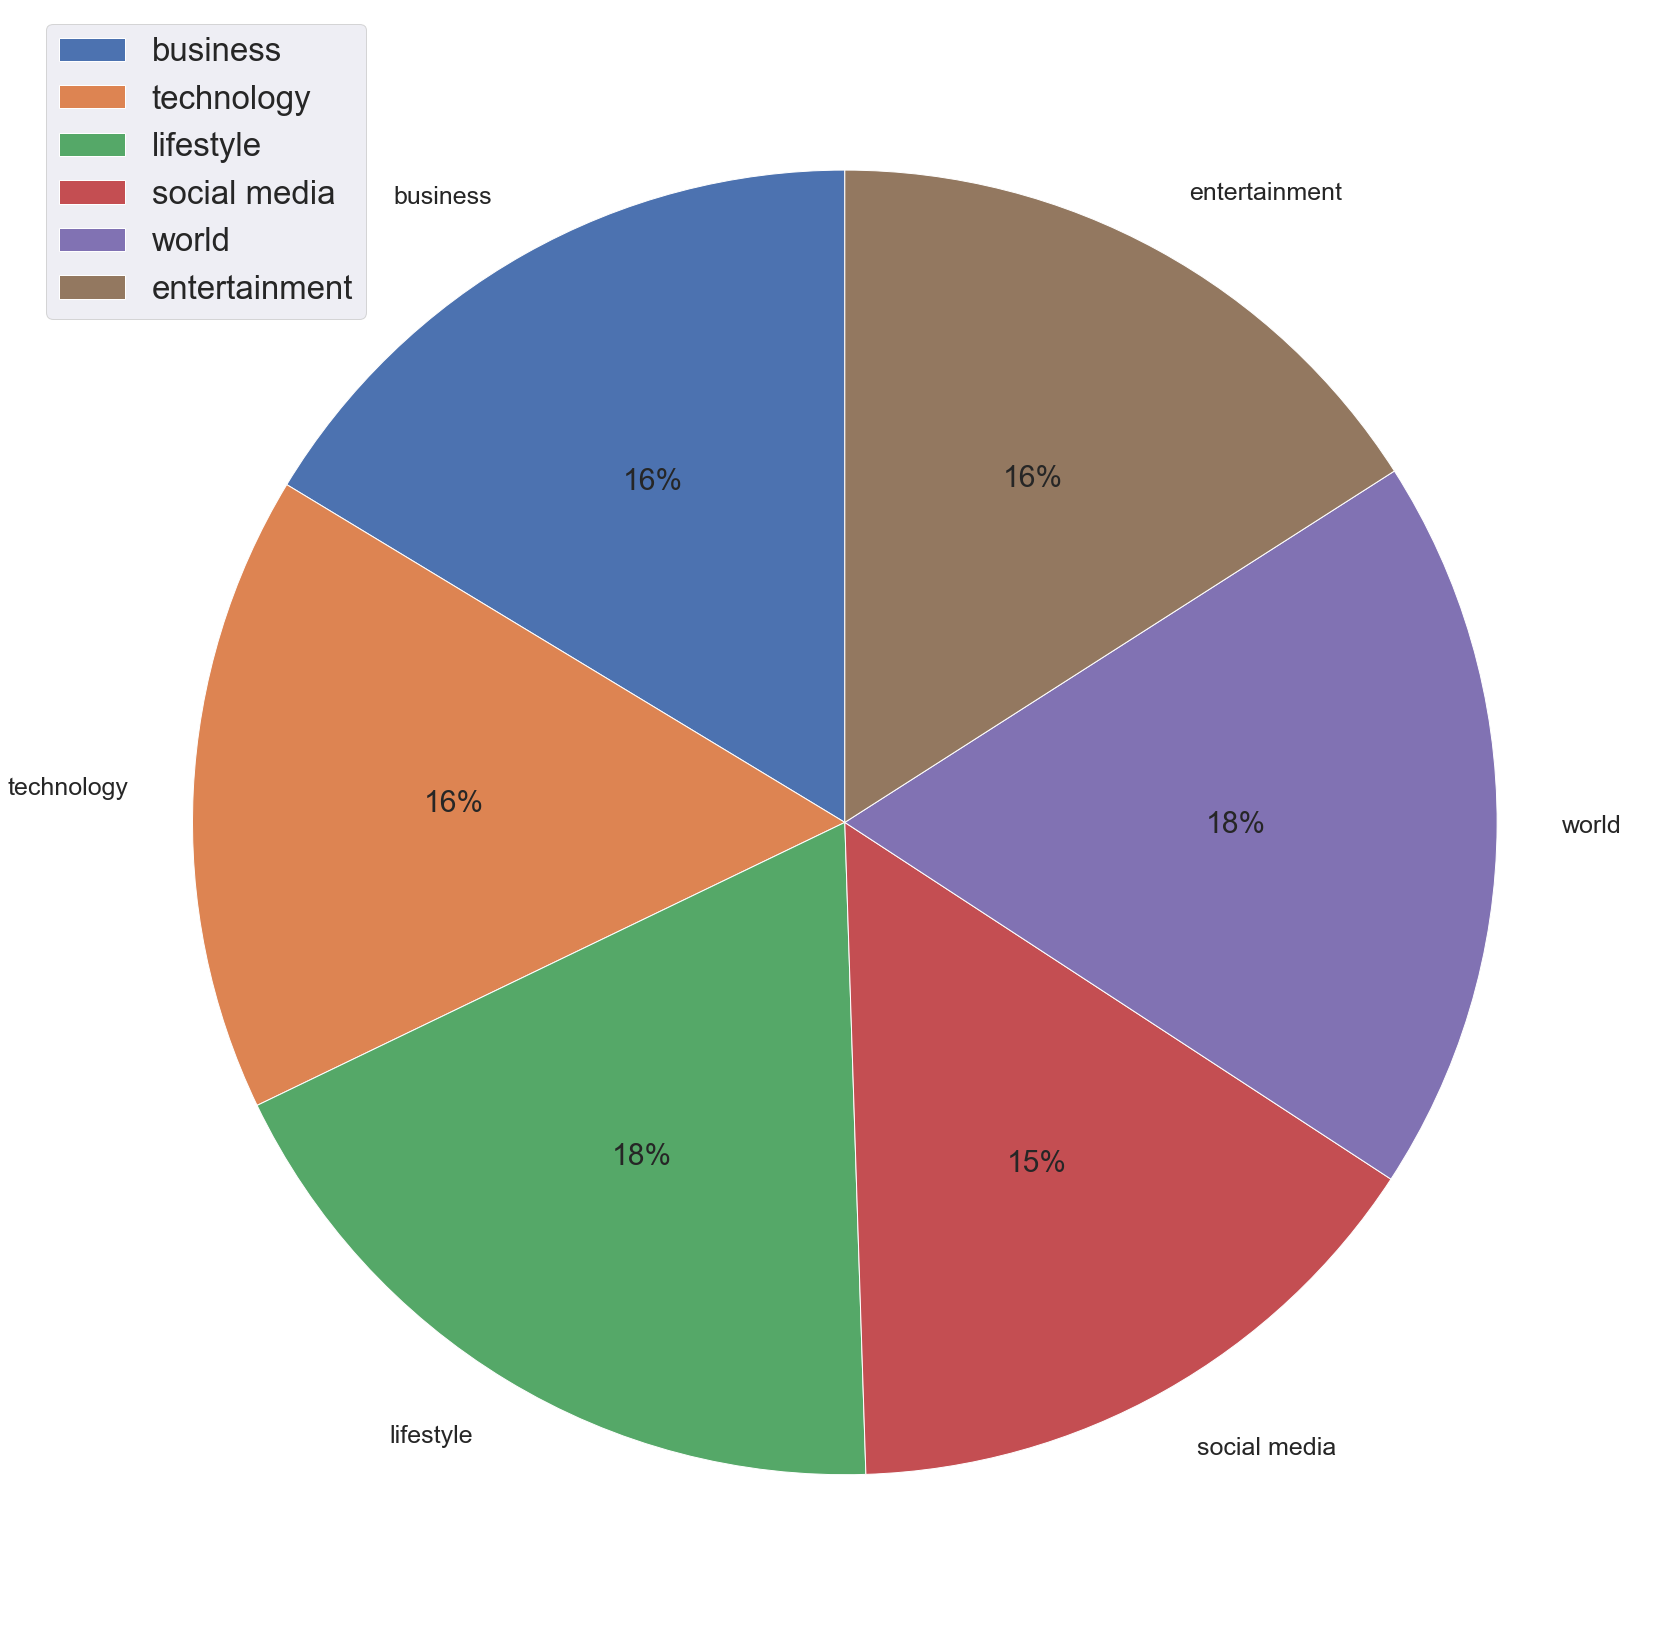

In [52]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0
labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))
sizes = [bus0,tech0,life0,world0,scomed0,ent0]
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend(loc=2)
plt.show()

# Now from this graph we are observing if the channel was not the article come from still life style and world base article find's 
# it's path way to get circulate

In [53]:
newdf['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

# now from this i'm seeing that maximum share value is 843k , then mean 3395 and then std is of 11k it's seems that lot of ouliers are there
# now we i'm also interested to see the analysis on href link of articles , link of other artcile published by mashable , the no. of image and vedio in content relates to how much share

In [54]:
newdf['num_hrefs'].describe()
tempdf=newdf.copy()

In [55]:
tempdf.loc[tempdf.num_hrefs <= 4.0,'num_hrefs']=1
tempdf.loc[(tempdf.num_hrefs <=8.0) & (tempdf.num_hrefs > 4.0),'num_hrefs']=2 
tempdf.loc[(tempdf.num_hrefs <=14.0) & (tempdf.num_hrefs > 8.0),'num_hrefs']=3
tempdf.loc[(tempdf.num_hrefs >=14.0),'num_hrefs']=4

In [56]:
tempdf['num_hrefs']

0        1.0
1        1.0
2        1.0
3        3.0
4        4.0
        ... 
39639    3.0
39640    3.0
39641    4.0
39642    3.0
39643    1.0
Name: num_hrefs, Length: 39644, dtype: float64

# conversion numerical to categorical variables for analysis of link , content , vedio in post is related to how much share

In [57]:
tempdf['num_imgs'].describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

In [58]:
tempdf.loc[tempdf.num_videos<=10,'num_videos']=1 # 38k rows
tempdf.loc[(tempdf.num_videos>10 ) & (tempdf.num_videos<=25),'num_videos']=2 #1.1k rows 
tempdf.loc[(tempdf.num_videos>26)&(tempdf.num_videos<=48),'num_videos']=3 #95 rows 
tempdf.loc[(tempdf.num_videos>48) & (tempdf.num_videos<=91),'num_videos']=4 # 38 rows 

In [59]:
tempdf['global_rate_negative_words'].describe()

count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64

# so till now we have make the categories of vedios , link , images in content lead to how much sharing and popularity now we will visualize it

Text(0, 0.5, 'no of shares ')

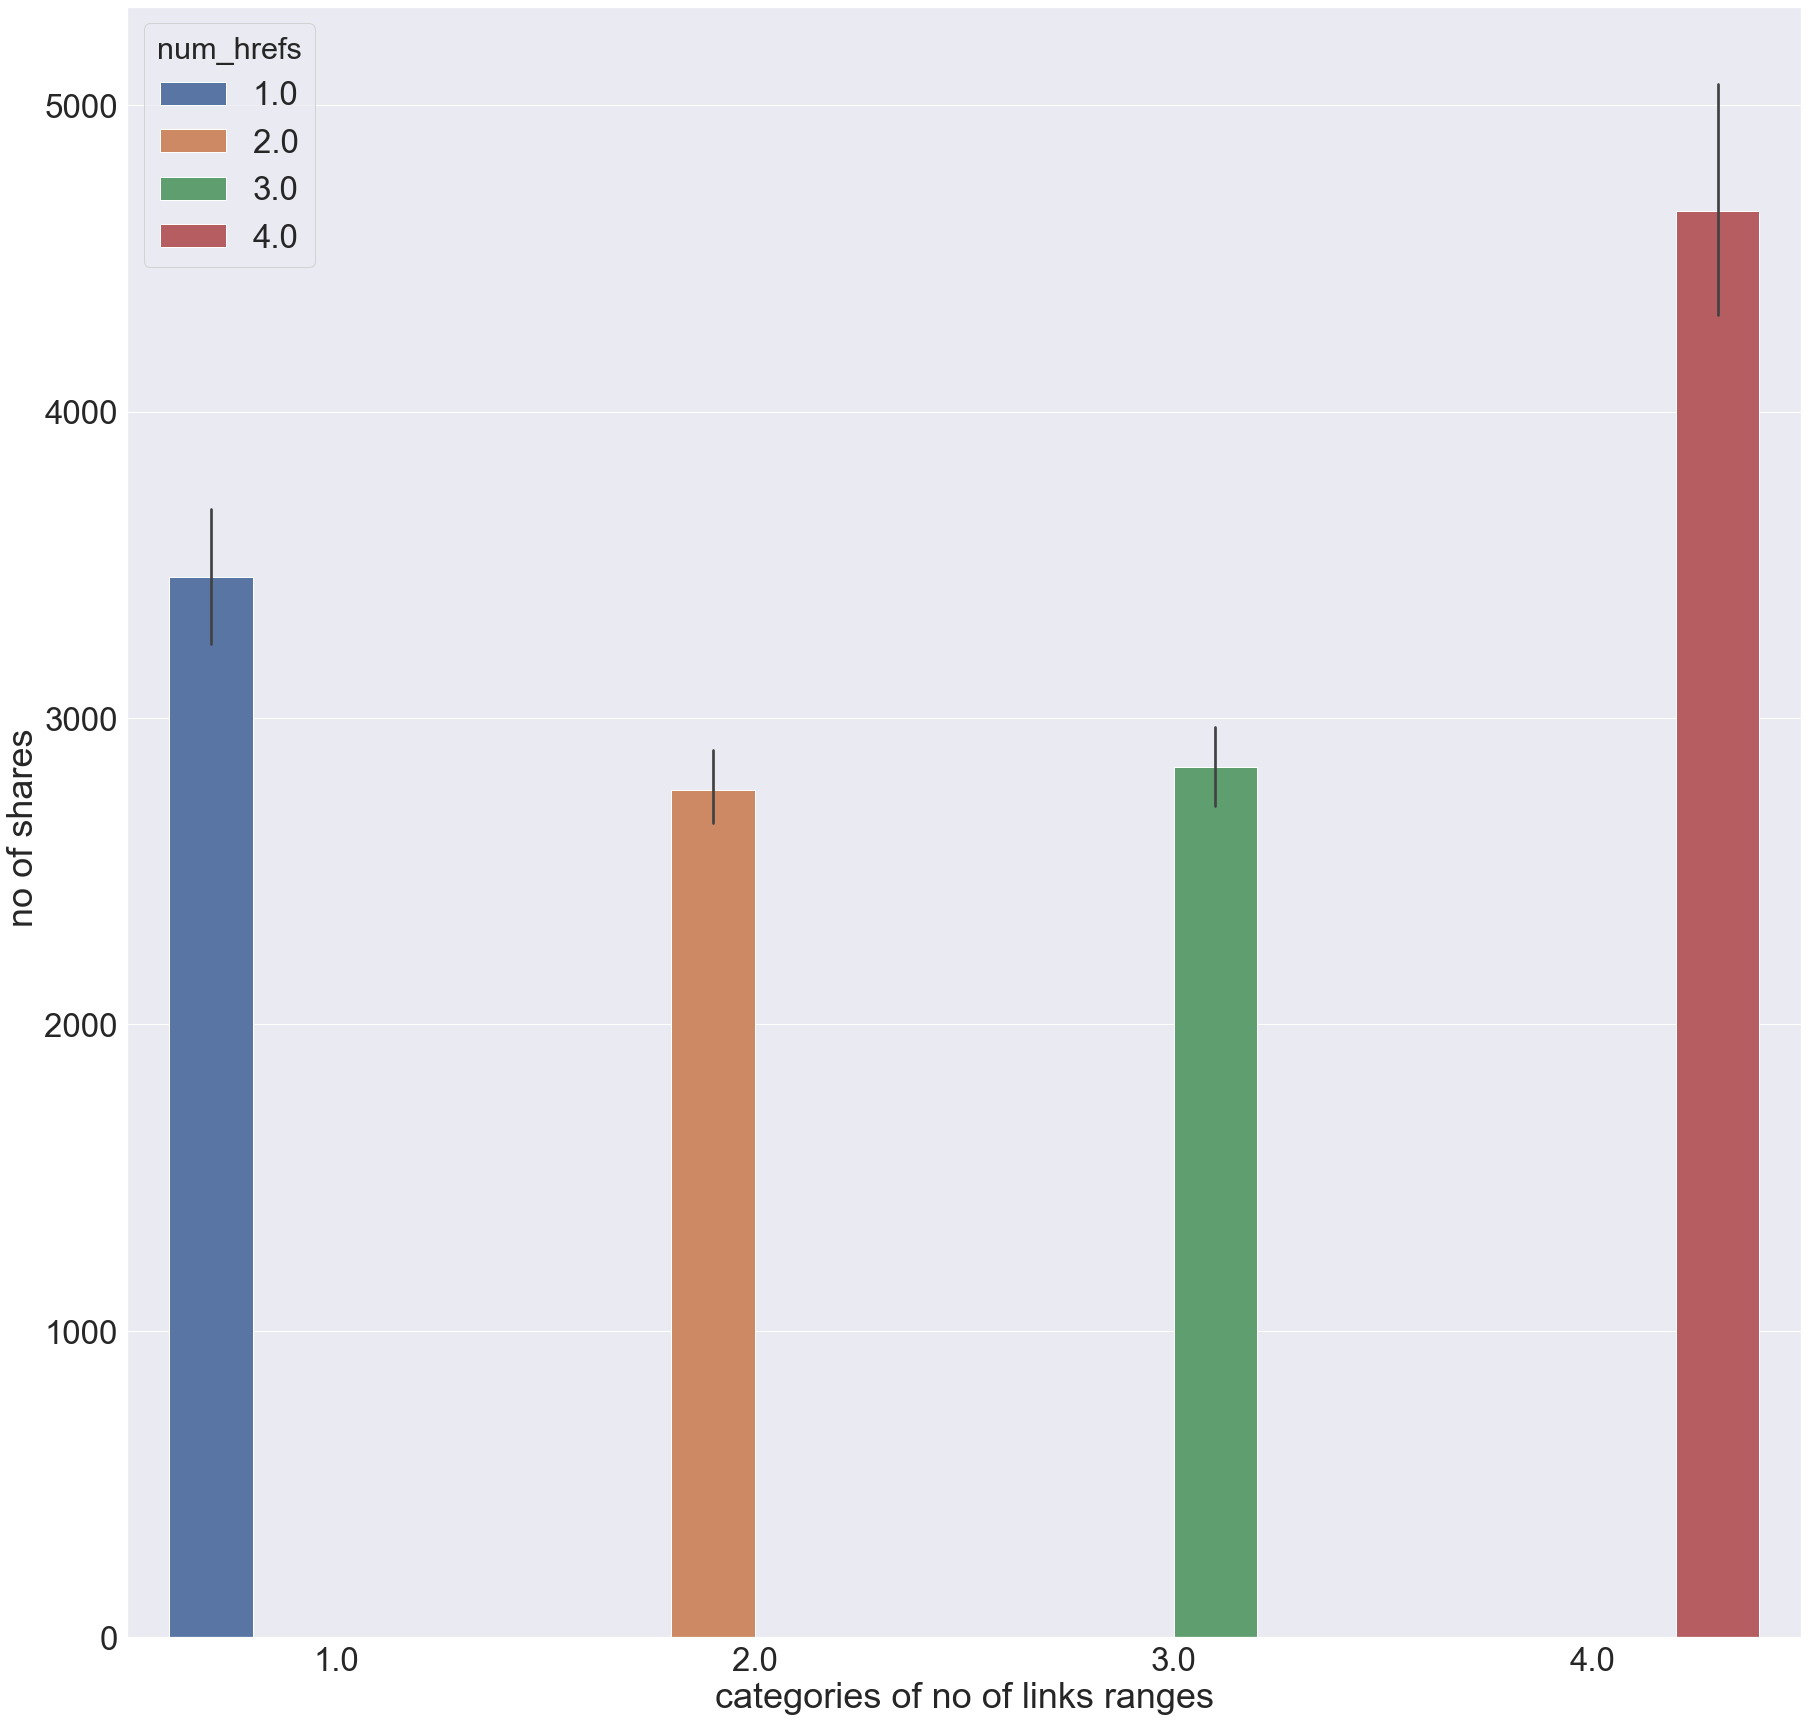

In [60]:
mpl.rcParams['font.size'] = 30.0
#labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))
sns.barplot(x='num_hrefs',y='shares',data=tempdf,hue='num_hrefs')
plt.xlabel(' categories of no of links ranges ')
plt.ylabel('no of shares ')

# ci of 95 % we can say that if we have no href 4 to 8 second category the maximum shares will be 150 
# as for greater above 8 and less 14  we can 520 shares and with greater than 14 , 600 approx shares will be there 

Text(0, 0.5, 'no of shares ')

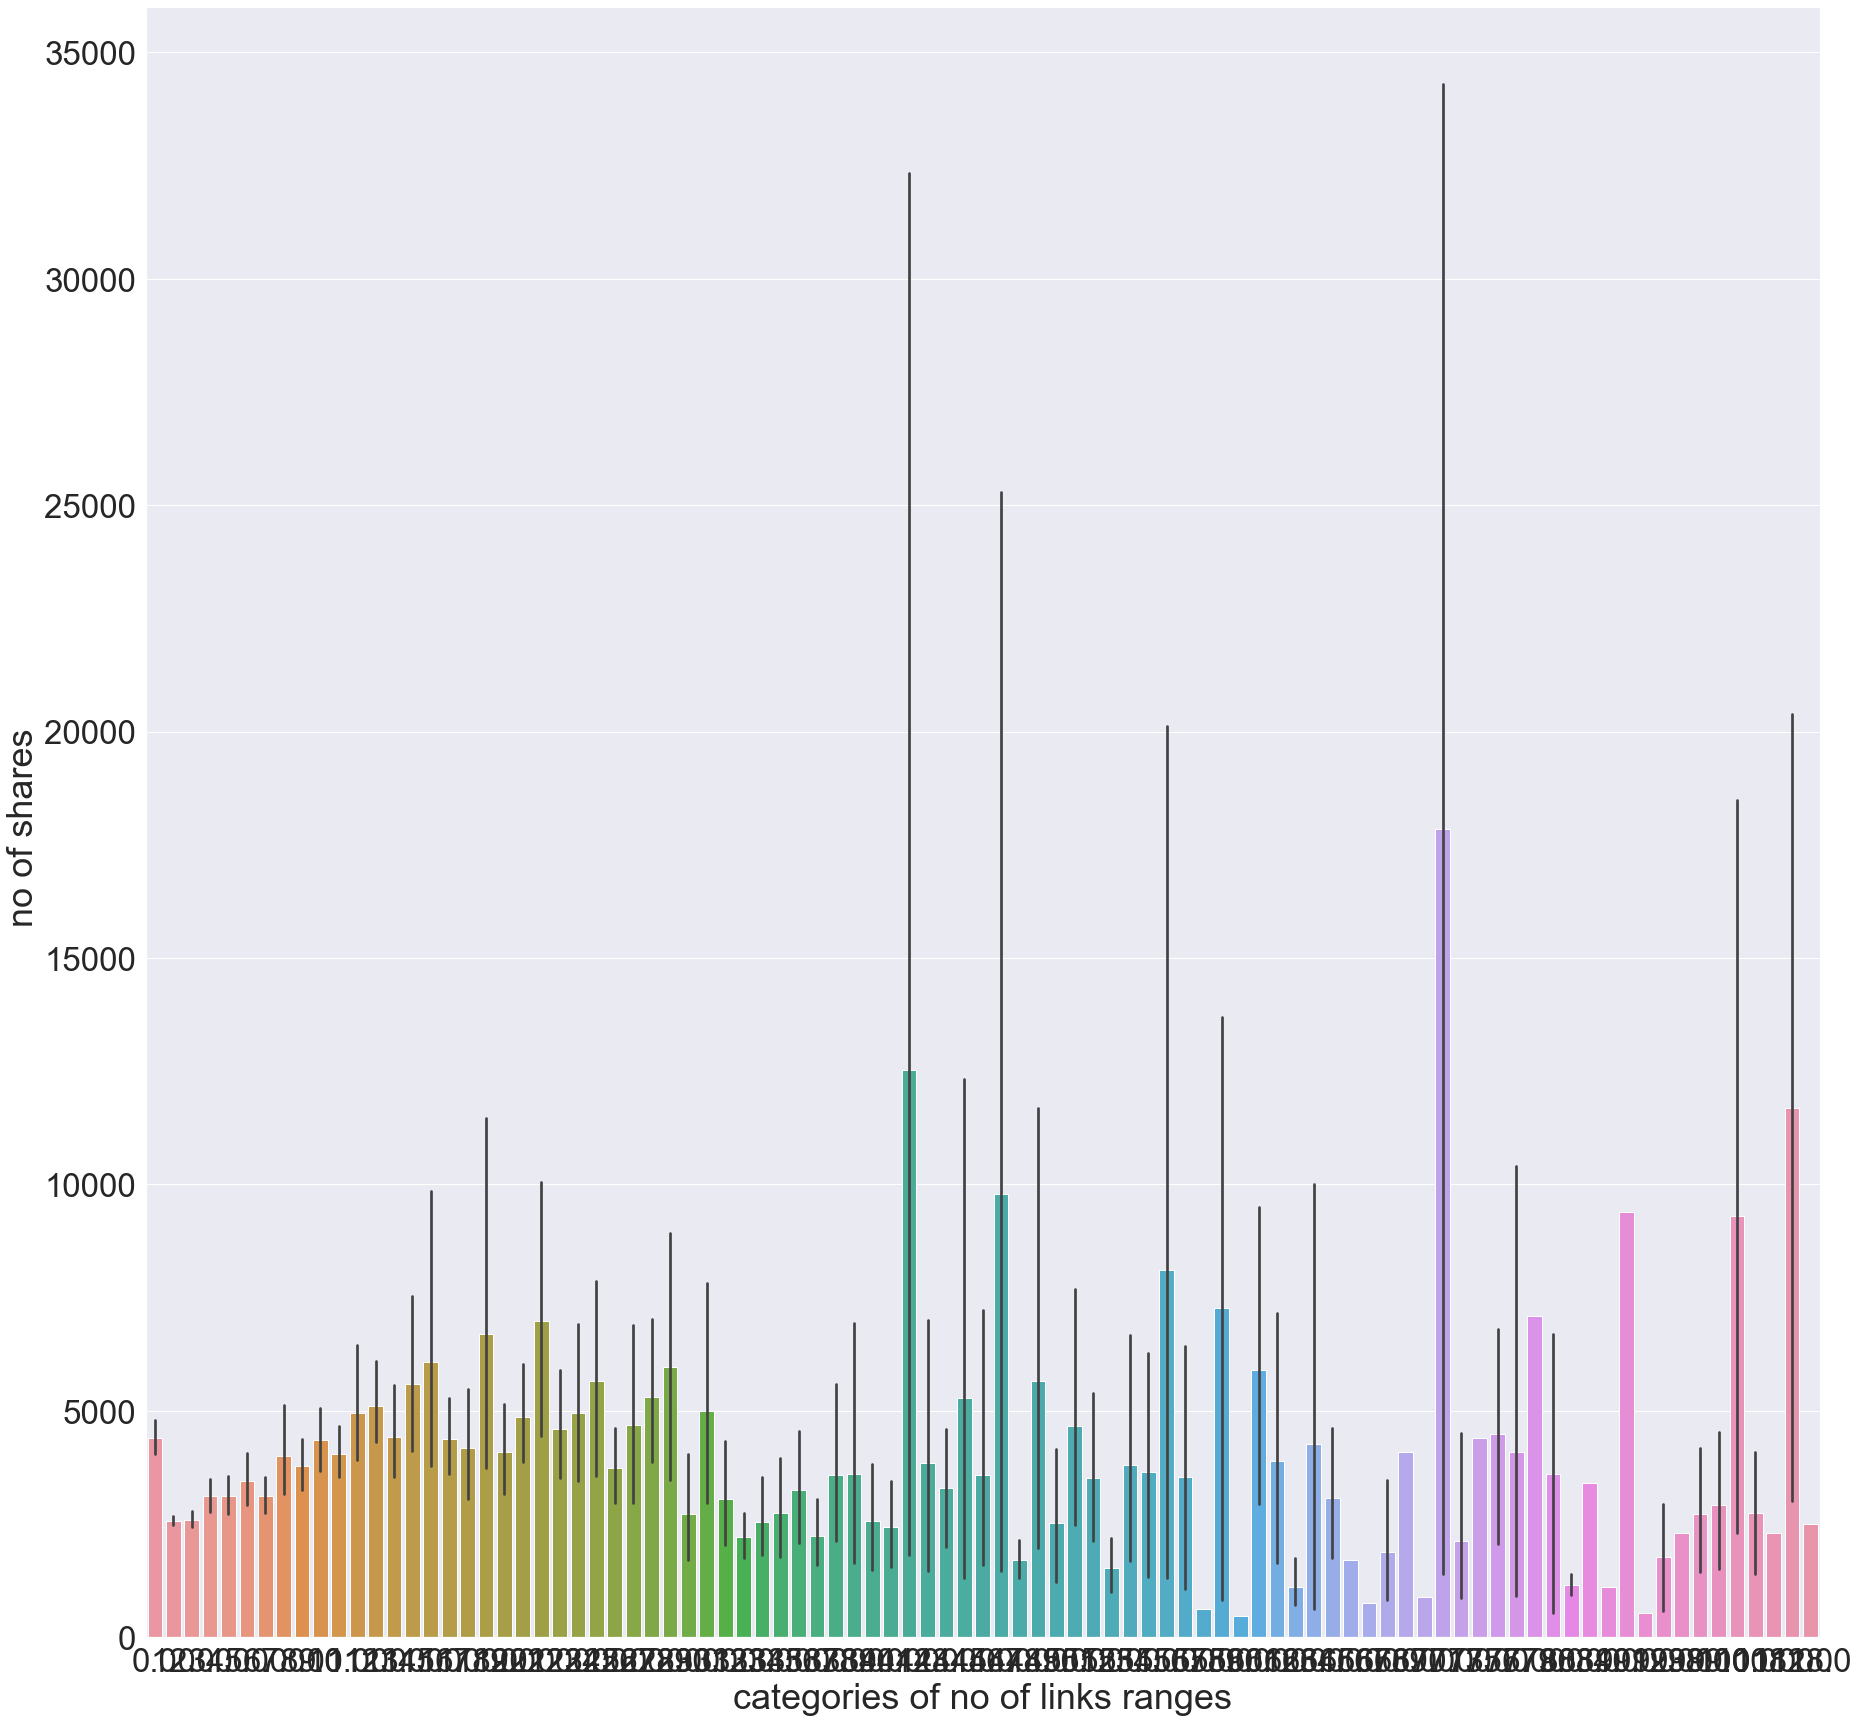

In [63]:
mpl.rcParams['font.size'] = 30.0
#labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))
sns.barplot(x='num_imgs',y='shares',data=tempdf)
plt.xlabel(' categories of no of links ranges ')
plt.ylabel('no of shares ')

# so we can say appropriate links with maximum share is 6 no of links we are getting max shares

Text(0, 0.5, 'no of shares ')

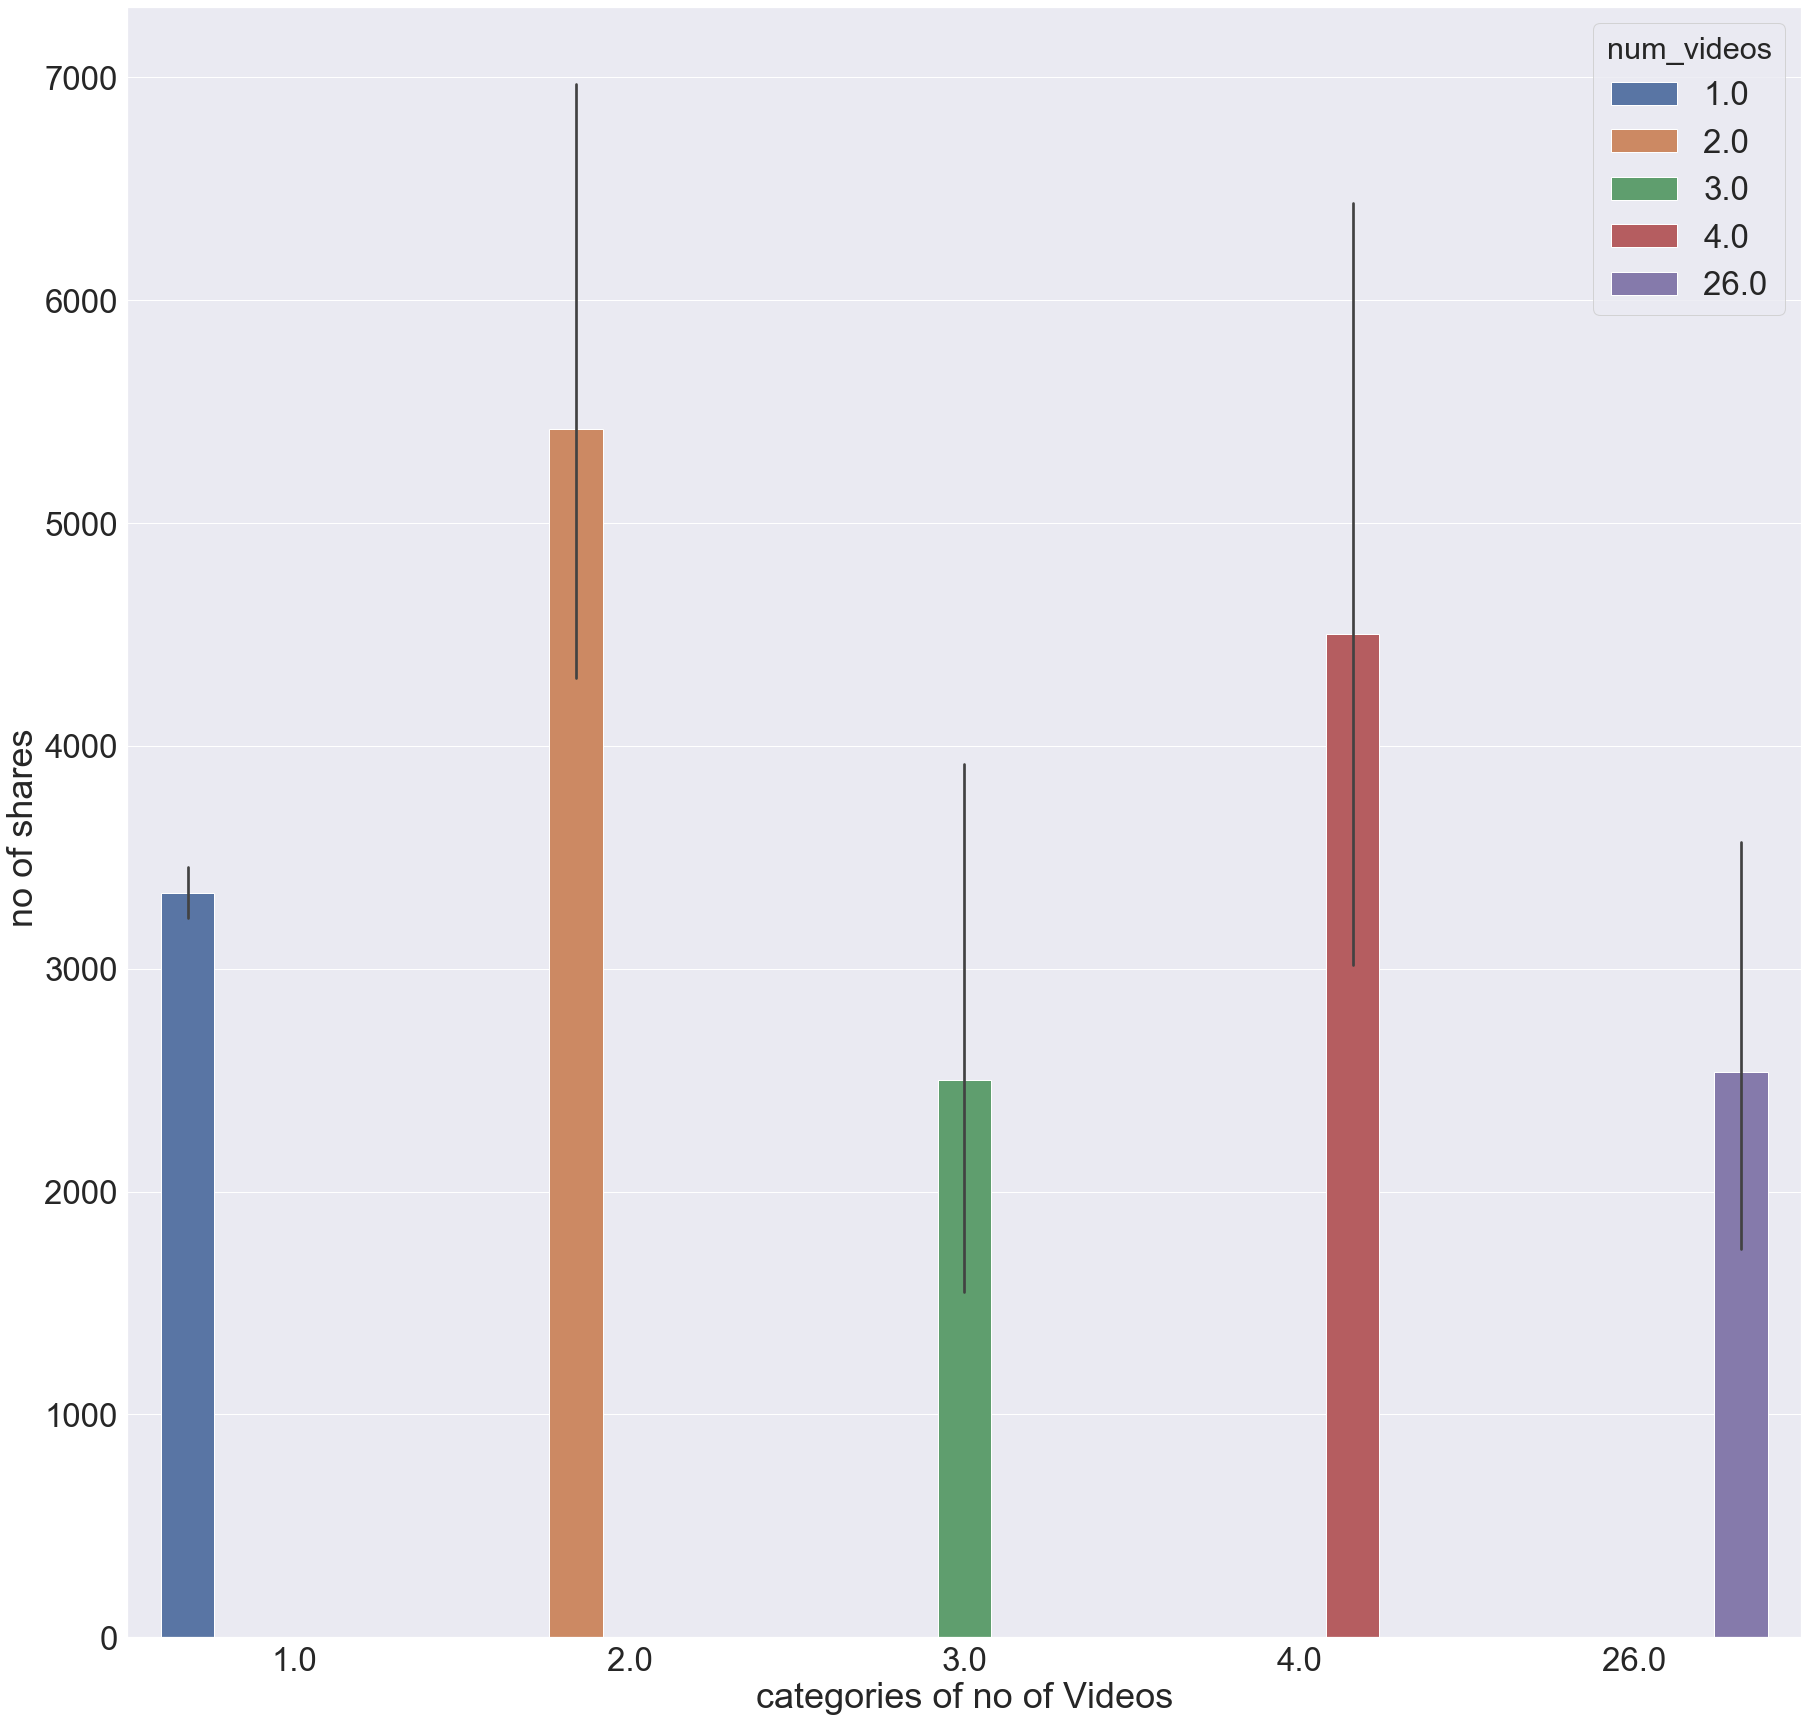

In [64]:
mpl.rcParams['font.size'] = 30.0
#labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))
sns.barplot(x='num_videos',y='shares',data=tempdf,hue='num_videos')
plt.xlabel(' categories of no of Videos ')
plt.ylabel('no of shares ')

# the more the vedio content the more will be sharing we can say 

# now we move towards outlier analysis and scaling and after this and check whole data how is distubuted around 0.05 and -0.05 of zscores then we will do Factor Analysis in PCA and LDA , then at last i will also make cluster of popularity of too , if possible 

In [65]:
mpl.rcParams['font.size'] = 30.0
#labels = ['business','technology','lifestyle','social media','world','entertainment']
plt.figure(figsize = (30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

# lot's values difficult to visualize so i will make for loop which plot consecutively bacth no of features so we can visualize it 

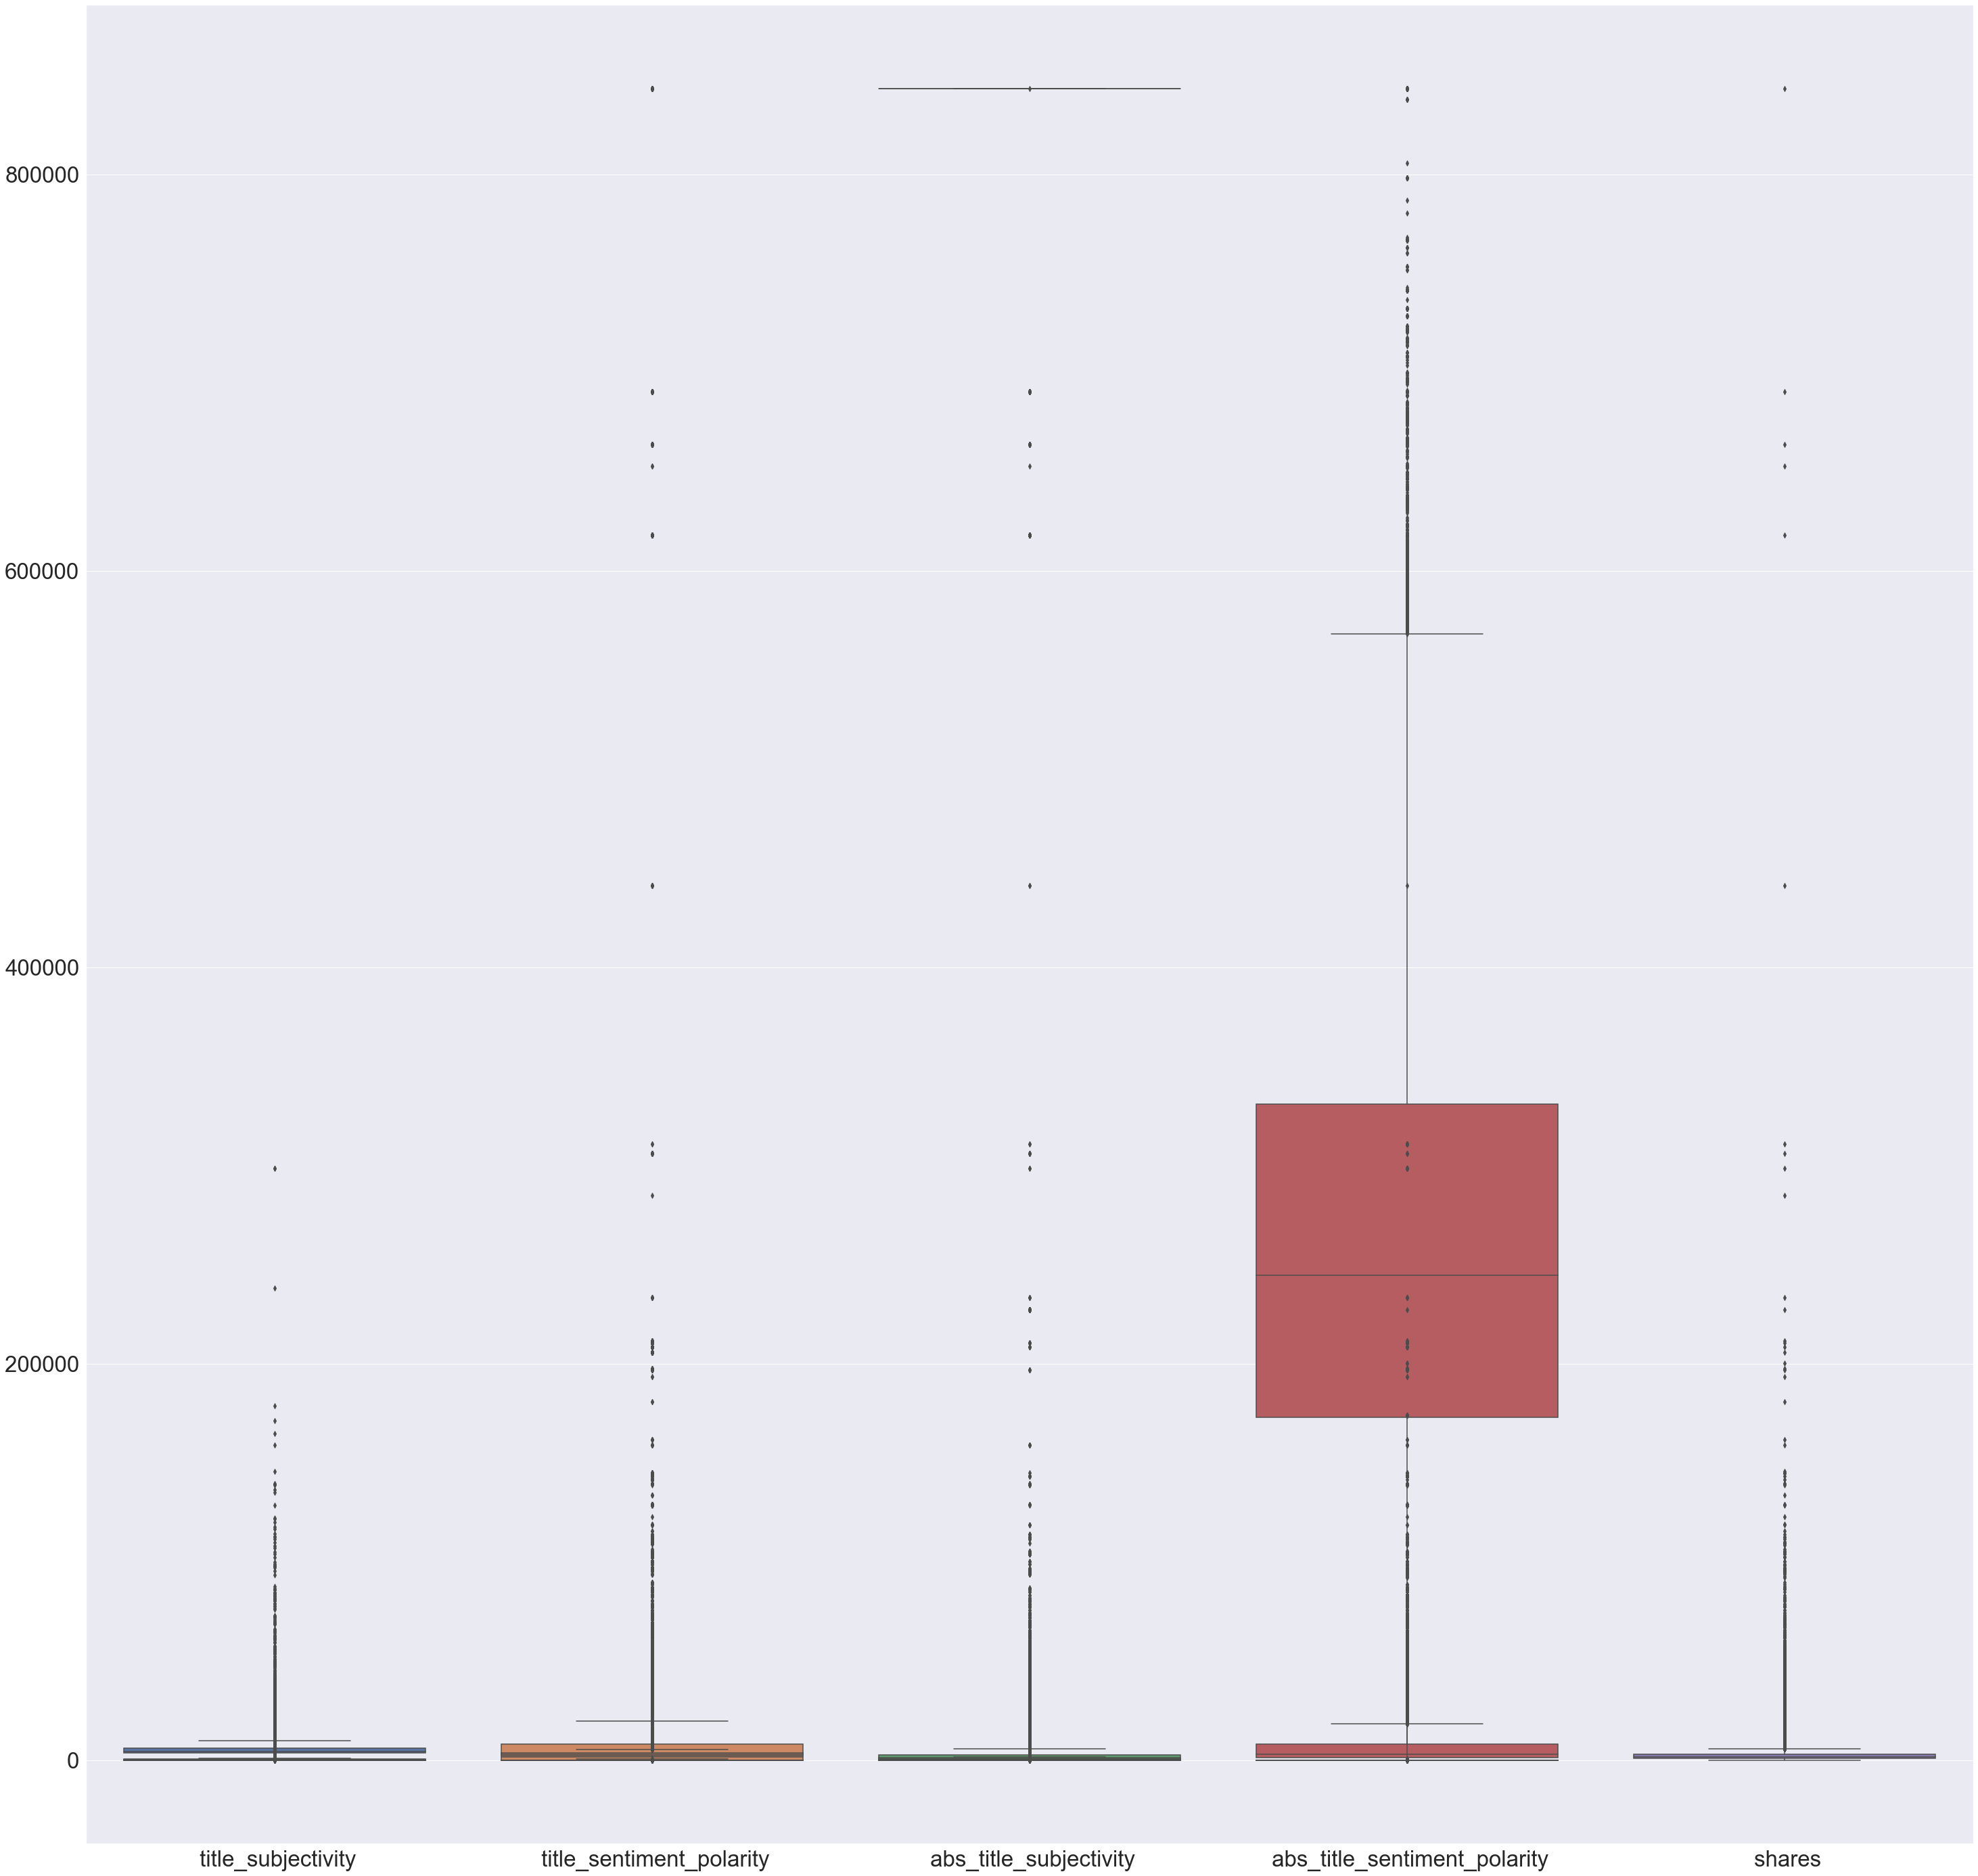

In [66]:
sns.boxplot(data=df.iloc[:,0:5])
sns.boxplot(data=df.iloc[:,6:10])
sns.boxplot(data=df.iloc[:,11:15])
sns.boxplot(data=df.iloc[:,16:20])
sns.boxplot(data=df.iloc[:,21:25])
sns.boxplot(data=df.iloc[:,26:30])
sns.boxplot(data=df.iloc[:,31:35])
sns.boxplot(data=df.iloc[:,36:40])
sns.boxplot(data=df.iloc[:,41:45])
sns.boxplot(data=df.iloc[:,46:50])
sns.boxplot(data=df.iloc[:,51:55])
sns.boxplot(data=df.iloc[:,56:61])

# n_token_contain has most outliers
# num_hrefs , self one and num_imgs
# average token has outliers , kw_min_min
# all kw variables has  ouliers and kw_avg_min has less
#  26 , 28, 29, 30 column has most outliers
# weekdays no analysis need
# LDA 0 , 02 ,03 ,04 and global sub and 46 to 50 then 51 and 53
# target varibable has lot's outliers 

In [10]:
from scipy.stats import chi2_contingency

# applying chiquare to test whether this varibale will be useful in prdicting the shares , called independent test on the basis of  observed  and expected frequencies 

In [11]:
global yes
global no
yes=[]
no=[]
class chisquare:
    def __init__(self,dataframe):
        self.df=dataframe
        self.p=None
        self.chi2=None
        self.dof=None
        self.expected=None
        self.observed=None
        
    def print_result(self,colx,alpha):
        result=""
        if self.p<alpha:
            result="{0} is important factor for pridiction".format(colx)
            yes.append(colx)
        else :
            result="{0} is not  important factor for pridiction".format(colx)
            no.append(colx)
        print(result)
    def testofindependence(self,colx,coly,alpha=0.05):
        x=self.df[colx].astype(str)
        y=self.df[coly].astype(str)
        self.observed=pd.crosstab(x,y)
        chi2,p,dof,expected=chi2_contingency(self.observed.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        self.expected = pd.DataFrame(expected, columns=self.observed.columns, index = self.observed.index)
        
        self.print_result(colx,alpha)
        
        
cT = chisquare(df)

#Feature Selection
testColumns = ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
for var in testColumns:
    cT.testofindependence(colx=var,coly="shares" )        

url is not  important factor for pridiction
timedelta is not  important factor for pridiction
n_tokens_title is not  important factor for pridiction
n_tokens_content is not  important factor for pridiction
n_unique_tokens is not  important factor for pridiction
n_non_stop_words is not  important factor for pridiction
n_non_stop_unique_tokens is not  important factor for pridiction
num_hrefs is important factor for pridiction
num_self_hrefs is not  important factor for pridiction
num_imgs is important factor for pridiction
num_videos is important factor for pridiction
average_token_length is not  important factor for pridiction
num_keywords is important factor for pridiction
data_channel_is_lifestyle is important factor for pridiction
 data_channel_is_entertainment is important factor for pridiction
data_channel_is_bus is not  important factor for pridiction
data_channel_is_socmed is important factor for pridiction
data_channel_is_tech is important factor for pridiction
data_channel_is_

In [12]:
predf=pd.DataFrame(yes,columns=['yes'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

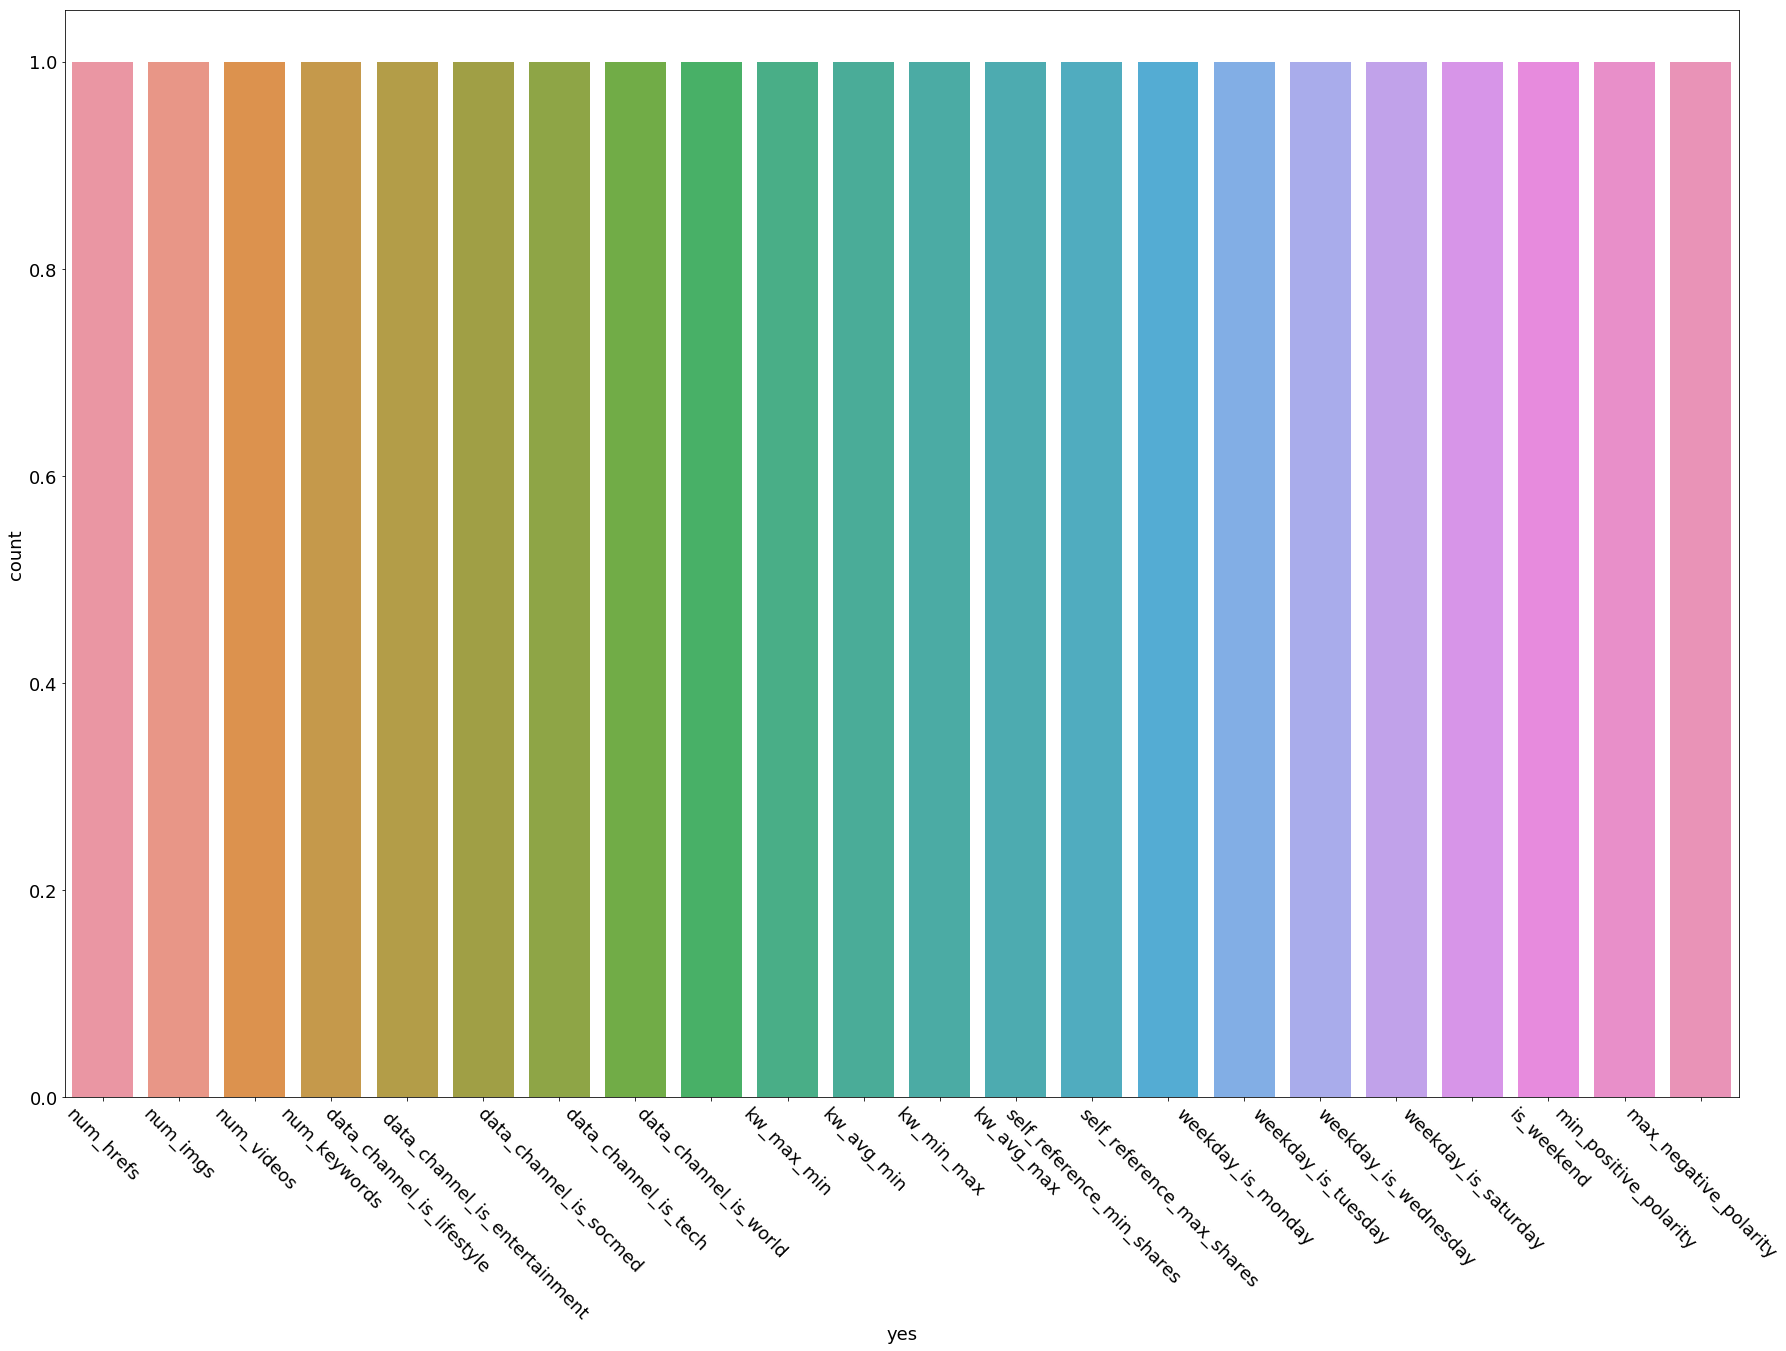

In [81]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 18.0

plt.figure(figsize=(30,20))
sns.countplot(x='yes',data=predf)
plt.xticks(rotation=-45)

# so out of 61 features our varibles which have direct connection with the target  are these jus 21 variables

In [70]:

import scipy.stats as stats

In [71]:
x=df['num_hrefs']
y=df['num_imgs']
z=df['num_videos']
a=df['num_keywords']
stats.f_oneway(x,y,z,a)

F_onewayResult(statistic=12131.618032726741, pvalue=0.0)

# from this we can say that mean of these four groups are having large differences so that important for pridictions 


In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('shares ~ num_hrefs+num_imgs+num_videos+num_keywords', data=df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

C:\Users\dhupar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                    sum_sq       df          F        PR(>F)
num_hrefs     4.368073e+09      1.0  32.419578  1.251048e-08
num_imgs      3.898426e+09      1.0  28.933889  7.531450e-08
num_videos    2.686854e+09      1.0  19.941671  8.006121e-06
num_keywords  1.324878e+09      1.0   9.833169  1.715181e-03
Residual      5.340786e+12  39639.0        NaN           NaN


# as i know links are best way by which it affects popularity too much as we can see the f - value of hrefs is highest 

# now our new dataset will be the above 21 variables and now let's start removal of outlier's first then transforming the data

In [13]:
finaldf=df.copy()

In [14]:
predf['yes'].values

array(['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_saturday', 'is_weekend', 'min_positive_polarity',
       'max_negative_polarity'], dtype=object)

In [16]:
finaldf=pd.DataFrame(data=df,columns=['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_saturday', 'is_weekend', 'min_positive_polarity',
       'max_negative_polarity'])

In [17]:
finaldf['shares']=df['shares']

In [34]:
df=df[np.abs(zscore(df)<3).all(axis=1)]


In [35]:
#df=df.drop('url',axis=1)
y=df['shares']
df=df.drop('shares',axis=1)

In [156]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 23 columns):
num_hrefs                         39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_socmed            39644 non-null float64
data_channel_is_tech              39644 non-null float64
data_channel_is_world             39644 non-null float64
kw_max_min                        39644 non-null float64
kw_avg_min                        39644 non-null float64
kw_min_max                        39644 non-null float64
kw_avg_max                        39644 non-null float64
self_reference_min_shares         39644 non-null float64
self_reference_max_shares         39644 non-null float64
weekday_is_monday                 39

In [158]:
print("data left in our hands",(len(finaldf.index)/len(df.index)*100))

data left in our hands 74.14993441630511


In [36]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [37]:
final= add_interactions(df)
print(final.head(5))

   timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            10.0             370.0         0.559889   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.698198        2.0             2.0   

   num_imgs  num_videos                         ...                           \
0       1.0         0.0                         ...         

[0.10590231 0.17480549 0.23725255 0.28847085 0.33544279 0.37911131
 0.41768971 0.45557846 0.49067358 0.52467236 0.55596142 0.58371945
 0.60729984 0.63004871 0.65084285 0.67133115 0.69154124 0.71152283
 0.73108747 0.75018553 0.76846363 0.78607923 0.80235709 0.81805773
 0.83310236 0.84743008 0.86000685 0.87192306 0.88295823 0.89327053
 0.90324575 0.91265179 0.9216202  0.92962749 0.93729026 0.94459104
 0.95136261 0.95754152 0.96294565 0.96829211 0.97237517 0.97636891
 0.9800161  0.9834475  0.98655867 0.98949094 0.99165274 0.99326057
 0.99458725 0.99585863 0.99683367 0.99773652 0.99850505 0.99912628
 0.99959453 0.9999877  1.         1.         1.         1.        ]


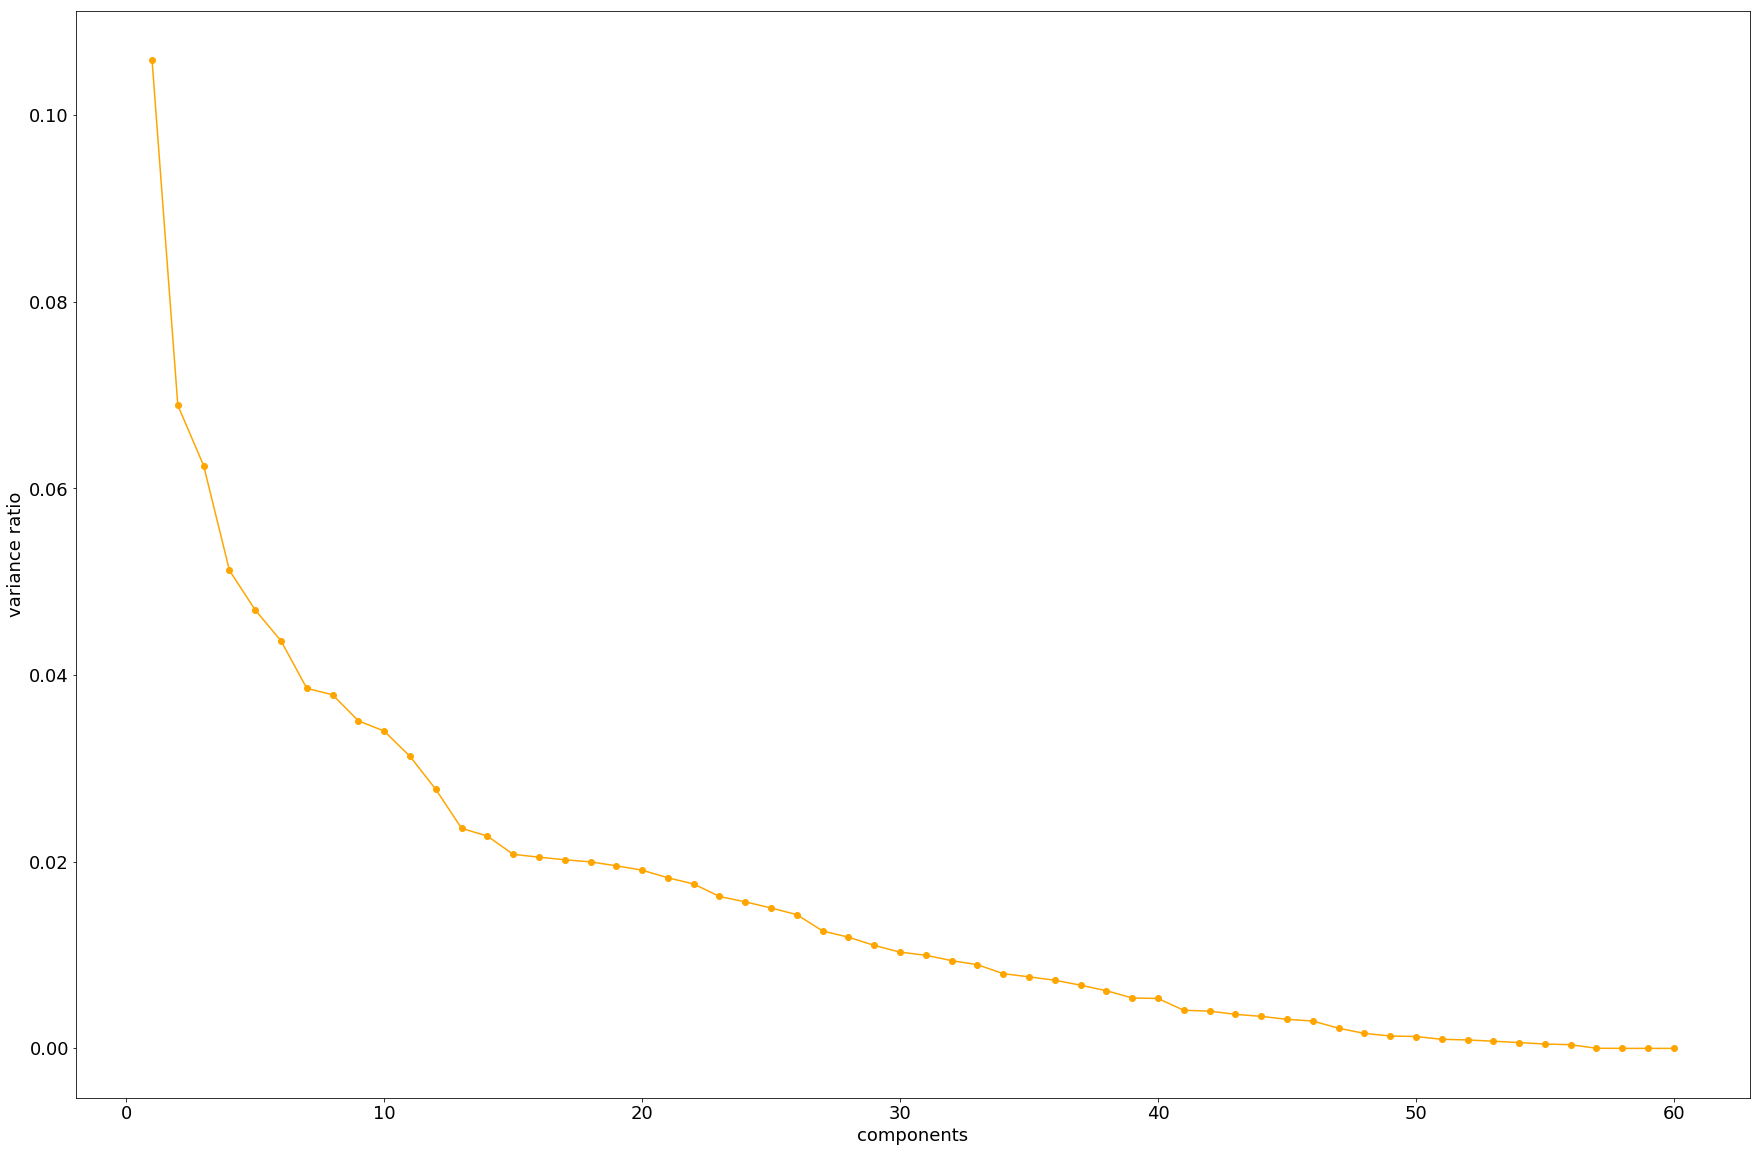

In [234]:
ratio=pca.explained_variance_ratio_
print(np.cumsum(ratio))
import matplotlib as mpl

mpl.rcParams['font.size'] = 18.0

plt.figure(figsize=(30,20))


plt.plot(range(1,61),ratio,marker="o",color="orange")
plt.xlabel('components')
plt.ylabel('variance ratio')
plt.show()

In [188]:
print(finaldf.columns)
#now with pca as we can see that with with 2nd component elbow is coming so we can see that only two components can explain this data about 58%
string=[]
string1=[]
for i in range(len(finaldf.columns)):
    string.append("PC"+str(i+1))
print(string)
for i in range(len(finaldf.columns)):
    string1.append("v"+str(i+1))
print(string1)    

Index(['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_saturday', 'is_weekend', 'min_positive_polarity',
       'max_negative_polarity', 'shares'],
      dtype='object')
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23']
['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23']


In [192]:
#we have to create two matrix for visualization of pca 
principal_comp=pd.DataFrame(data=reduced,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                               'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
                                                               'PC21', 'PC22'])
principal_comp.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.403492  0.145468 -2.798655  1.162453 -0.673373 -0.079408  0.177463   
1  1.008971 -0.514819  1.058933 -1.698118 -1.309583  1.811176 -0.866392   
2 -0.275650 -0.538608 -0.868826 -1.831647  0.345930 -1.145195 -1.703711   
3 -5.215804  0.341986 -1.865480  1.444335  1.910666  0.936365 -0.722450   
4  0.227837  0.746951 -2.572318 -0.987118 -1.452874 -0.603341  1.031438   

        PC8       PC9      PC10      ...           PC13      PC14      PC15  \
0  1.203606  0.810694  1.086094      ...      -0.019693  0.168375 -0.038111   
1 -0.577947 -0.622199 -0.408561      ...       0.094963  0.494097 -0.743074   
2 -0.779049 -0.054398  0.007536      ...      -0.513100 -0.329793 -0.002390   
3 -3.422849  2.238617  1.274308      ...       2.392016  3.223310 -0.150134   
4  3.964892  6.095293  1.238361      ...      -0.381460  0.345598  0.412202   

       PC16      PC17      PC18      PC19          PC20          PC21  \
0  0.319194  0.887987  0.588255 -0.127564 -1.959935e-16 -2.268762e-17   
1 -0.305073 -0.396318  0.238951  0.141204 -6.339789e-17 -1.259483e-17   
2  0.034050 -0.455497  0.881880 -0.049835 -8.596172e-17 -2.291074e-17   
3 -0.078966  0.933987 -0.939132  0.131774  4.335909e-17  6.978716e-17   
4  0.278110 -0.709877 -0.233457  0.684871  4.250762e-15  6.889972e-15   

           PC22  
0  2.822628e-19  
1 -3.038624e-19  
2  1.955299e-18  
3 -1.013852e-19  
4  1.364932e-18  

[5 rows x 22 columns]

In [197]:
pca_load=pd.DataFrame(data=pca.components_.T,index=['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_saturday', 'is_weekend', 'min_positive_polarity',
       'max_negative_polarity'],columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 
                                                         'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 
                                                         'v21', 'v22'])
pca_load.head()

v1            v2        v3            v4  \
num_hrefs                  0.039682  3.261018e-01  0.463987  2.140849e-01   
num_imgs                   0.027550  3.866159e-01  0.350975  9.334245e-02   
num_videos                -0.064189  1.362833e-01 -0.110606  3.052216e-01   
num_keywords               0.339830  7.521584e-02  0.296139 -1.127472e-01   
data_channel_is_lifestyle  0.000000 -5.551115e-17 -0.000000 -1.387779e-16   

                                     v5            v6            v7  \
num_hrefs                 -5.229408e-02 -2.508003e-02 -9.483000e-02   
num_imgs                  -1.827702e-01 -5.929355e-02 -1.667295e-01   
num_videos                -1.006107e-01  4.557498e-02 -5.938567e-02   
num_keywords              -1.665474e-01 -4.735861e-02 -2.408746e-02   
data_channel_is_lifestyle -7.632783e-17  2.255141e-16 -4.163336e-17   

                                     v8            v9           v10  \
num_hrefs                 -5.003602e-02  9.529843e-02  2.770879e-01   
num_imgs                  -1.098289e-01  9.553251e-02  3.682598e-01   
num_videos                 1.497155e-01 -2.236557e-01 -3.182828e-01   
num_keywords               1.880338e-01 -5.950471e-02 -1.403461e-01   
data_channel_is_lifestyle -1.179612e-16 -2.775558e-17 -2.775558e-17   

                               ...                v13           v14  \
num_hrefs                      ...       3.186410e-01 -1.913858e-01   
num_imgs                       ...      -1.962342e-01 -9.126086e-03   
num_videos                     ...       2.133597e-01 -4.333710e-02   
num_keywords                   ...      -4.645103e-01  5.820226e-01   
data_channel_is_lifestyle      ...       2.775558e-17 -1.110223e-16   

                                    v15           v16           v17  \
num_hrefs                 -5.271462e-01 -2.604884e-01  1.518357e-02   
num_imgs                   6.511375e-01  8.802061e-02 -6.848167e-03   
num_videos                 3.208188e-01 -4.322825e-02  2.708800e-03   
num_keywords              -2.075012e-01  3.414432e-02 -6.509924e-03   
data_channel_is_lifestyle -1.387779e-16  1.110223e-16 -8.326673e-17   

                                    v18           v19           v20  \
num_hrefs                  8.964711e-02 -1.090274e-02  5.716681e-19   
num_imgs                  -4.592370e-03 -1.519477e-03  2.906955e-17   
num_videos                -3.199969e-02  2.108802e-02  1.452515e-16   
num_keywords              -4.577921e-02 -7.039877e-02 -9.815299e-17   
data_channel_is_lifestyle -1.110223e-16  4.440892e-16  5.157475e-01   

                                    v21           v22  
num_hrefs                  5.371487e-18  4.187969e-18  
num_imgs                  -1.540926e-17  2.350380e-17  
num_videos                 1.489076e-16 -9.271500e-18  
num_keywords               1.434653e-17  3.249921e-17  
data_channel_is_lifestyle  7.001293e-01  4.937848e-01  

[5 rows x 22 columns]

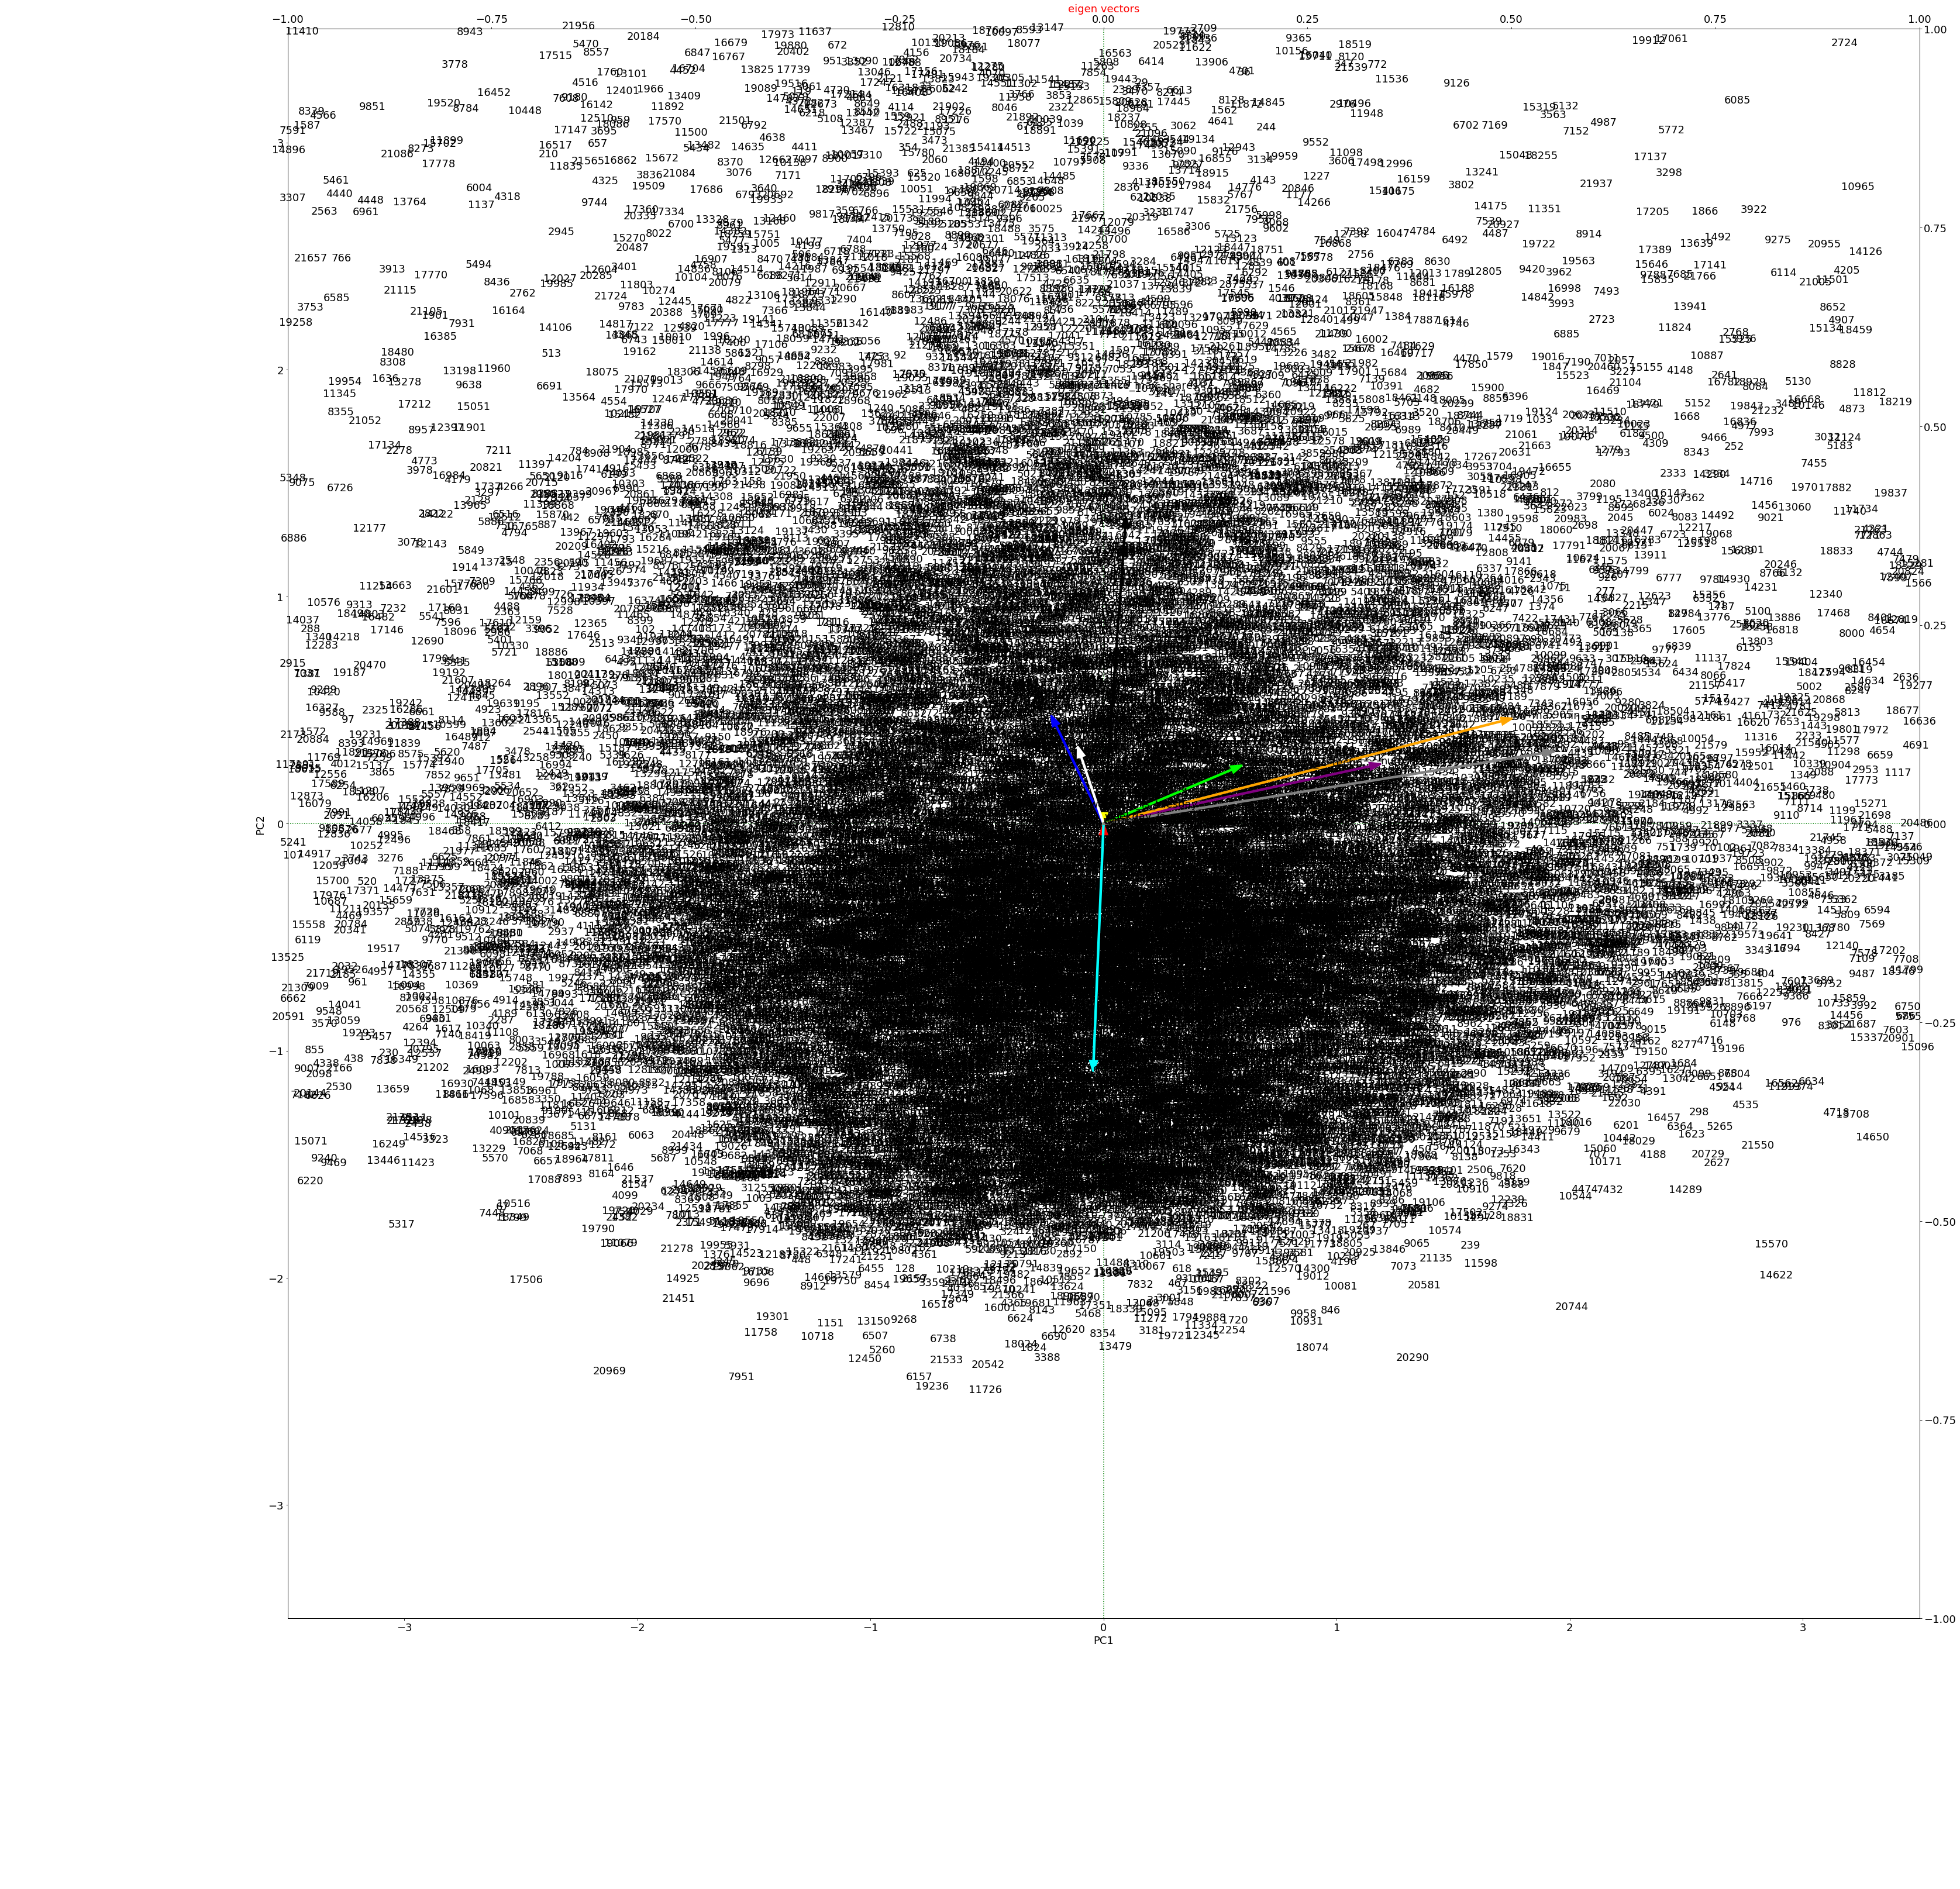

In [198]:
plt.figure(figsize=(50,50))
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
for i in principal_comp.index:
    plt.annotate(i,(principal_comp.PC1.loc[i],principal_comp.PC2.loc[i]),ha='center')
plt.hlines(0,-3.5,3.5,linestyle='dotted',color='green')
plt.vlines(0,-3.5,3.5,linestyle='dotted',color='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt1=plt.twinx().twiny()
#setting limits
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('eigen vectors',color='red')
a=1.07
for i in pca_load.index:
    plt.annotate(i,(pca_load.v1.loc[i],pca_load.v2.loc[i]))
for i,j in zip(range(1,31),['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']):    
    plt.arrow(0,0, pca_load.v1[i],pca_load.v2[i],color=j,shape='full',length_includes_head=True,head_width=.009,lw=3)
    
plt.show()    

# sometimes graph is so large we can't explain everything but as per now we can say  most data are explaine by first two components 